In [89]:
import h5py

import fenics as fe
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, "../scripts")

from tqdm import tqdm
from statfenics.utils import build_observation_operator
from swe import ShallowOne
from swe_filter import ShallowOneEx

In [90]:
def run_tidal_model(nu):
    control = {"nx": NX, "dt": DT, "theta": 1.0, "simulation": "tidal_flow"}
    params = {"nu": nu}
    swe_dgp = ShallowOne(control, params)

    t = 0.
    du_init = swe_dgp.du.vector().get_local().copy()

    nx_save = swe_dgp.du.compute_vertex_values()[:(NX + 1)].shape[0]
    u_out = np.zeros((NT, nx_save))

    nx_save = swe_dgp.du.compute_vertex_values()[(NX + 1):].shape[0]
    h_out = np.zeros((NT, nx_save))

    for i in tqdm(range(NT)):
        t += swe_dgp.dt
        swe_dgp.solve(t)
        u_out[i, :] = swe_dgp.du.compute_vertex_values()[(NX + 1):]
        h_out[i, :] = swe_dgp.du.compute_vertex_values()[(NX + 1):]

    return u_out, h_out


In [91]:
NX = 400
DT = 2.5
# set the observation system
NT_WARMUP = 0
t_final = 86_400 / 2  # half a day
NT = np.int64(t_final / DT)


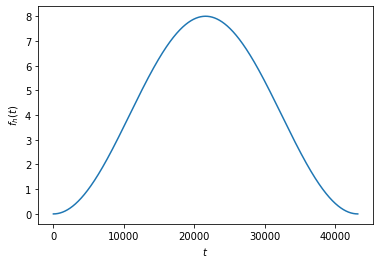

In [92]:
control = {"nx": NX, "dt": DT, "theta": 1.0, "simulation": "tidal_flow"}
params = {"nu": 1e-2}
swe_dgp = ShallowOne(control, params)

nt_skip = [1, 4, 10, 20, 40, 100]

skip = 100
t_final = 86_400 / 2  # half a day
nt_all = np.int64(t_final / DT)
t_grid = np.linspace(0, t_final, nt_all)

tidal_bc = swe_dgp.tidal_bc(t_grid)
plt.plot(t_grid, tidal_bc)
plt.ylabel(r"$f_h(t)$")
plt.xlabel(r"$t$")
plt.show()

In [93]:
u, h = run_tidal_model(1e-2)
ud, hd = run_tidal_model(1e-1)

  0%|                                                                               | 0/17280 [00:00<?, ?it/s]

  0%|▏                                                                    | 39/17280 [00:00<00:44, 385.35it/s]

  0%|▎                                                                    | 78/17280 [00:00<00:44, 386.58it/s]

  1%|▍                                                                   | 117/17280 [00:00<00:45, 373.86it/s]

  1%|▌                                                                   | 155/17280 [00:00<00:51, 335.42it/s]

  1%|▋                                                                   | 190/17280 [00:00<00:54, 314.49it/s]

  1%|▊                                                                   | 222/17280 [00:00<00:55, 305.44it/s]

  1%|▉                                                                   | 253/17280 [00:00<00:57, 297.59it/s]

  2%|█                                                                   | 283/17280 [00:00<00:57, 294.67it/s]

  2%|█▏                                                                  | 313/17280 [00:00<00:57, 292.81it/s]

  2%|█▎                                                                  | 343/17280 [00:01<00:58, 291.27it/s]

  2%|█▍                                                                  | 373/17280 [00:01<00:58, 290.27it/s]

  2%|█▌                                                                  | 403/17280 [00:01<00:58, 289.77it/s]

  2%|█▋                                                                  | 432/17280 [00:01<00:58, 289.43it/s]

  3%|█▊                                                                  | 461/17280 [00:01<00:58, 289.11it/s]

  3%|█▉                                                                  | 490/17280 [00:01<00:58, 288.97it/s]

  3%|██                                                                  | 519/17280 [00:01<00:58, 288.86it/s]

  3%|██▏                                                                 | 548/17280 [00:01<00:57, 288.72it/s]

  3%|██▎                                                                 | 577/17280 [00:01<00:57, 288.37it/s]

  4%|██▍                                                                 | 606/17280 [00:02<00:57, 288.41it/s]

  4%|██▍                                                                 | 635/17280 [00:02<00:57, 288.40it/s]

  4%|██▌                                                                 | 664/17280 [00:02<00:57, 288.19it/s]

  4%|██▋                                                                 | 693/17280 [00:02<00:57, 288.33it/s]

  4%|██▊                                                                 | 722/17280 [00:02<00:57, 288.09it/s]

  4%|██▉                                                                 | 751/17280 [00:02<00:57, 287.81it/s]

  5%|███                                                                 | 780/17280 [00:02<00:58, 281.96it/s]

  5%|███▏                                                                | 809/17280 [00:02<00:58, 283.38it/s]

  5%|███▎                                                                | 838/17280 [00:02<00:57, 284.58it/s]

  5%|███▍                                                                | 867/17280 [00:02<00:57, 285.24it/s]

  5%|███▌                                                                | 896/17280 [00:03<00:57, 285.57it/s]

  5%|███▋                                                                | 925/17280 [00:03<00:57, 285.97it/s]

  6%|███▊                                                                | 954/17280 [00:03<00:57, 286.18it/s]

  6%|███▊                                                                | 983/17280 [00:03<00:56, 286.38it/s]

  6%|███▉                                                               | 1012/17280 [00:03<00:56, 286.35it/s]

  6%|████                                                               | 1041/17280 [00:03<00:56, 286.49it/s]

  6%|████▏                                                              | 1070/17280 [00:03<00:56, 286.62it/s]

  6%|████▎                                                              | 1099/17280 [00:03<00:56, 286.69it/s]

  7%|████▎                                                              | 1128/17280 [00:03<00:56, 286.72it/s]

  7%|████▍                                                              | 1157/17280 [00:03<00:56, 286.74it/s]

  7%|████▌                                                              | 1186/17280 [00:04<00:56, 286.62it/s]

  7%|████▋                                                              | 1215/17280 [00:04<00:57, 281.30it/s]

  7%|████▊                                                              | 1244/17280 [00:04<00:56, 282.78it/s]

  7%|████▉                                                              | 1273/17280 [00:04<00:56, 283.85it/s]

  8%|█████                                                              | 1302/17280 [00:04<00:56, 284.63it/s]

  8%|█████▏                                                             | 1331/17280 [00:04<00:55, 285.28it/s]

  8%|█████▎                                                             | 1360/17280 [00:04<00:55, 285.69it/s]

  8%|█████▍                                                             | 1389/17280 [00:04<00:55, 286.03it/s]

  8%|█████▍                                                             | 1418/17280 [00:04<00:55, 286.35it/s]

  8%|█████▌                                                             | 1447/17280 [00:04<00:55, 286.31it/s]

  9%|█████▋                                                             | 1476/17280 [00:05<00:55, 286.42it/s]

  9%|█████▊                                                             | 1505/17280 [00:05<00:55, 286.47it/s]

  9%|█████▉                                                             | 1534/17280 [00:05<00:54, 286.52it/s]

  9%|██████                                                             | 1563/17280 [00:05<00:54, 286.58it/s]

  9%|██████▏                                                            | 1592/17280 [00:05<00:54, 286.66it/s]

  9%|██████▎                                                            | 1621/17280 [00:05<00:54, 285.55it/s]

 10%|██████▍                                                            | 1650/17280 [00:05<00:55, 281.56it/s]

 10%|██████▌                                                            | 1679/17280 [00:05<00:55, 283.10it/s]

 10%|██████▌                                                            | 1708/17280 [00:05<00:54, 284.03it/s]

 10%|██████▋                                                            | 1737/17280 [00:05<00:54, 284.55it/s]

 10%|██████▊                                                            | 1766/17280 [00:06<00:54, 285.22it/s]

 10%|██████▉                                                            | 1795/17280 [00:06<00:54, 285.76it/s]

 11%|███████                                                            | 1824/17280 [00:06<00:54, 285.97it/s]

 11%|███████▏                                                           | 1853/17280 [00:06<00:53, 286.20it/s]

 11%|███████▎                                                           | 1882/17280 [00:06<00:53, 286.34it/s]

 11%|███████▍                                                           | 1911/17280 [00:06<00:53, 286.43it/s]

 11%|███████▌                                                           | 1940/17280 [00:06<00:53, 286.53it/s]

 11%|███████▋                                                           | 1969/17280 [00:06<00:53, 286.57it/s]

 12%|███████▋                                                           | 1998/17280 [00:06<00:53, 286.65it/s]

 12%|███████▊                                                           | 2027/17280 [00:06<00:53, 286.46it/s]

 12%|███████▉                                                           | 2056/17280 [00:07<00:54, 281.31it/s]

 12%|████████                                                           | 2085/17280 [00:07<00:53, 282.63it/s]

 12%|████████▏                                                          | 2114/17280 [00:07<00:53, 283.78it/s]

 12%|████████▎                                                          | 2143/17280 [00:07<00:53, 284.73it/s]

 13%|████████▍                                                          | 2172/17280 [00:07<00:52, 285.38it/s]

 13%|████████▌                                                          | 2201/17280 [00:07<00:52, 285.82it/s]

 13%|████████▋                                                          | 2230/17280 [00:07<00:52, 286.19it/s]

 13%|████████▊                                                          | 2259/17280 [00:07<00:52, 286.50it/s]

 13%|████████▊                                                          | 2288/17280 [00:07<00:52, 286.60it/s]

 13%|████████▉                                                          | 2317/17280 [00:08<00:52, 286.49it/s]

 14%|█████████                                                          | 2346/17280 [00:08<00:52, 286.65it/s]

 14%|█████████▏                                                         | 2375/17280 [00:08<00:52, 286.60it/s]

 14%|█████████▎                                                         | 2404/17280 [00:08<00:51, 286.46it/s]

 14%|█████████▍                                                         | 2433/17280 [00:08<00:51, 286.61it/s]

 14%|█████████▌                                                         | 2462/17280 [00:08<00:51, 286.72it/s]

 14%|█████████▋                                                         | 2491/17280 [00:08<00:52, 281.13it/s]

 15%|█████████▊                                                         | 2520/17280 [00:08<00:52, 282.70it/s]

 15%|█████████▉                                                         | 2549/17280 [00:08<00:51, 283.84it/s]

 15%|█████████▉                                                         | 2578/17280 [00:08<00:51, 284.68it/s]

 15%|██████████                                                         | 2607/17280 [00:09<00:51, 285.05it/s]

 15%|██████████▏                                                        | 2636/17280 [00:09<00:51, 285.46it/s]

 15%|██████████▎                                                        | 2665/17280 [00:09<00:51, 285.79it/s]

 16%|██████████▍                                                        | 2694/17280 [00:09<00:50, 286.04it/s]

 16%|██████████▌                                                        | 2723/17280 [00:09<00:50, 286.30it/s]

 16%|██████████▋                                                        | 2752/17280 [00:09<00:50, 286.43it/s]

 16%|██████████▊                                                        | 2781/17280 [00:09<00:50, 286.58it/s]

 16%|██████████▉                                                        | 2810/17280 [00:09<00:50, 286.70it/s]

 16%|███████████                                                        | 2839/17280 [00:09<00:50, 286.85it/s]

 17%|███████████                                                        | 2868/17280 [00:09<00:50, 286.77it/s]

 17%|███████████▏                                                       | 2897/17280 [00:10<00:50, 286.57it/s]

 17%|███████████▎                                                       | 2926/17280 [00:10<00:51, 281.08it/s]

 17%|███████████▍                                                       | 2955/17280 [00:10<00:50, 282.58it/s]

 17%|███████████▌                                                       | 2984/17280 [00:10<00:50, 283.74it/s]

 17%|███████████▋                                                       | 3013/17280 [00:10<00:50, 284.59it/s]

 18%|███████████▊                                                       | 3042/17280 [00:10<00:50, 281.92it/s]

 18%|███████████▉                                                       | 3071/17280 [00:10<00:50, 283.68it/s]

 18%|████████████                                                       | 3100/17280 [00:10<00:49, 284.99it/s]

 18%|████████████▏                                                      | 3129/17280 [00:10<00:49, 286.07it/s]

 18%|████████████▏                                                      | 3158/17280 [00:10<00:49, 286.65it/s]

 18%|████████████▎                                                      | 3187/17280 [00:11<00:49, 287.14it/s]

 19%|████████████▍                                                      | 3216/17280 [00:11<00:48, 287.60it/s]

 19%|████████████▌                                                      | 3245/17280 [00:11<00:48, 287.74it/s]

 19%|████████████▋                                                      | 3274/17280 [00:11<00:48, 287.90it/s]

 19%|████████████▊                                                      | 3303/17280 [00:11<00:48, 288.17it/s]

 19%|████████████▉                                                      | 3332/17280 [00:11<00:48, 288.22it/s]

 19%|█████████████                                                      | 3361/17280 [00:11<00:48, 284.48it/s]

 20%|█████████████▏                                                     | 3390/17280 [00:11<00:49, 280.50it/s]

 20%|█████████████▎                                                     | 3419/17280 [00:11<00:50, 275.88it/s]

 20%|█████████████▎                                                     | 3448/17280 [00:11<00:49, 279.33it/s]

 20%|█████████████▍                                                     | 3476/17280 [00:12<00:49, 278.55it/s]

 20%|█████████████▌                                                     | 3505/17280 [00:12<00:48, 281.25it/s]

 20%|█████████████▋                                                     | 3534/17280 [00:12<00:48, 282.89it/s]

 21%|█████████████▊                                                     | 3563/17280 [00:12<00:48, 284.12it/s]

 21%|█████████████▉                                                     | 3592/17280 [00:12<00:49, 277.62it/s]

 21%|██████████████                                                     | 3620/17280 [00:12<00:49, 277.40it/s]

 21%|██████████████▏                                                    | 3649/17280 [00:12<00:48, 280.16it/s]

 21%|██████████████▎                                                    | 3678/17280 [00:12<00:48, 282.04it/s]

 21%|██████████████▎                                                    | 3707/17280 [00:12<00:47, 283.43it/s]

 22%|██████████████▍                                                    | 3736/17280 [00:13<00:47, 284.10it/s]

 22%|██████████████▌                                                    | 3765/17280 [00:13<00:48, 278.96it/s]

 22%|██████████████▋                                                    | 3793/17280 [00:13<00:51, 261.09it/s]

 22%|██████████████▊                                                    | 3820/17280 [00:13<00:52, 256.94it/s]

 22%|██████████████▉                                                    | 3849/17280 [00:13<00:50, 264.75it/s]

 22%|███████████████                                                    | 3878/17280 [00:13<00:49, 271.20it/s]

 23%|███████████████▏                                                   | 3906/17280 [00:13<00:49, 270.81it/s]

 23%|███████████████▎                                                   | 3935/17280 [00:13<00:48, 274.82it/s]

 23%|███████████████▎                                                   | 3964/17280 [00:13<00:47, 278.43it/s]

 23%|███████████████▍                                                   | 3993/17280 [00:13<00:47, 280.82it/s]

 23%|███████████████▌                                                   | 4022/17280 [00:14<00:48, 273.09it/s]

 23%|███████████████▋                                                   | 4051/17280 [00:14<00:47, 277.16it/s]

 24%|███████████████▊                                                   | 4080/17280 [00:14<00:47, 279.89it/s]

 24%|███████████████▉                                                   | 4109/17280 [00:14<00:46, 281.91it/s]

 24%|████████████████                                                   | 4138/17280 [00:14<00:46, 283.37it/s]

 24%|████████████████▏                                                  | 4167/17280 [00:14<00:46, 284.34it/s]

 24%|████████████████▎                                                  | 4196/17280 [00:14<00:48, 271.14it/s]

 24%|████████████████▍                                                  | 4224/17280 [00:14<00:48, 271.94it/s]

 25%|████████████████▍                                                  | 4253/17280 [00:14<00:47, 276.32it/s]

 25%|████████████████▌                                                  | 4282/17280 [00:14<00:46, 279.31it/s]

 25%|████████████████▋                                                  | 4311/17280 [00:15<00:46, 281.62it/s]

 25%|████████████████▊                                                  | 4340/17280 [00:15<00:45, 283.14it/s]

 25%|████████████████▉                                                  | 4369/17280 [00:15<00:46, 280.56it/s]

 25%|█████████████████                                                  | 4398/17280 [00:15<00:46, 276.67it/s]

 26%|█████████████████▏                                                 | 4427/17280 [00:15<00:45, 279.62it/s]

 26%|█████████████████▎                                                 | 4456/17280 [00:15<00:45, 281.81it/s]

 26%|█████████████████▍                                                 | 4485/17280 [00:15<00:45, 283.26it/s]

 26%|█████████████████▌                                                 | 4514/17280 [00:15<00:44, 284.25it/s]

 26%|█████████████████▌                                                 | 4543/17280 [00:15<00:44, 283.46it/s]

 26%|█████████████████▋                                                 | 4572/17280 [00:16<00:45, 279.88it/s]

 27%|█████████████████▊                                                 | 4601/17280 [00:16<00:44, 281.85it/s]

 27%|█████████████████▉                                                 | 4630/17280 [00:16<00:45, 277.93it/s]

 27%|██████████████████                                                 | 4659/17280 [00:16<00:44, 280.47it/s]

 27%|██████████████████▏                                                | 4688/17280 [00:16<00:45, 275.95it/s]

 27%|██████████████████▎                                                | 4717/17280 [00:16<00:45, 279.10it/s]

 27%|██████████████████▍                                                | 4746/17280 [00:16<00:44, 281.40it/s]

 28%|██████████████████▌                                                | 4775/17280 [00:16<00:44, 280.65it/s]

 28%|██████████████████▋                                                | 4804/17280 [00:16<00:44, 282.81it/s]

 28%|██████████████████▋                                                | 4833/17280 [00:16<00:44, 278.50it/s]

 28%|██████████████████▊                                                | 4862/17280 [00:17<00:44, 281.18it/s]

 28%|██████████████████▉                                                | 4891/17280 [00:17<00:43, 283.27it/s]

 28%|███████████████████                                                | 4920/17280 [00:17<00:43, 284.64it/s]

 29%|███████████████████▏                                               | 4949/17280 [00:17<00:43, 285.78it/s]

 29%|███████████████████▎                                               | 4978/17280 [00:17<00:43, 281.38it/s]

 29%|███████████████████▍                                               | 5007/17280 [00:17<00:43, 281.25it/s]

 29%|███████████████████▌                                               | 5036/17280 [00:17<00:43, 279.95it/s]

 29%|███████████████████▋                                               | 5065/17280 [00:17<00:45, 270.43it/s]

 29%|███████████████████▊                                               | 5094/17280 [00:17<00:44, 275.04it/s]

 30%|███████████████████▊                                               | 5123/17280 [00:17<00:43, 278.43it/s]

 30%|███████████████████▉                                               | 5152/17280 [00:18<00:43, 280.85it/s]

 30%|████████████████████                                               | 5181/17280 [00:18<00:42, 282.64it/s]

 30%|████████████████████▏                                              | 5210/17280 [00:18<00:42, 282.96it/s]

 30%|████████████████████▎                                              | 5239/17280 [00:18<00:43, 277.59it/s]

 30%|████████████████████▍                                              | 5268/17280 [00:18<00:42, 280.16it/s]

 31%|████████████████████▌                                              | 5297/17280 [00:18<00:42, 282.11it/s]

 31%|████████████████████▋                                              | 5326/17280 [00:18<00:42, 283.49it/s]

 31%|████████████████████▊                                              | 5355/17280 [00:18<00:41, 284.34it/s]

 31%|████████████████████▉                                              | 5384/17280 [00:18<00:41, 285.02it/s]

 31%|████████████████████▉                                              | 5413/17280 [00:19<00:42, 279.57it/s]

 31%|█████████████████████                                              | 5442/17280 [00:19<00:42, 281.69it/s]

 32%|█████████████████████▏                                             | 5471/17280 [00:19<00:42, 277.79it/s]

 32%|█████████████████████▎                                             | 5500/17280 [00:19<00:42, 280.05it/s]

 32%|█████████████████████▍                                             | 5529/17280 [00:19<00:41, 281.98it/s]

 32%|█████████████████████▌                                             | 5558/17280 [00:19<00:42, 277.01it/s]

 32%|█████████████████████▋                                             | 5587/17280 [00:19<00:41, 279.88it/s]

 32%|█████████████████████▊                                             | 5616/17280 [00:19<00:42, 276.91it/s]

 33%|█████████████████████▉                                             | 5644/17280 [00:19<00:43, 266.54it/s]

 33%|█████████████████████▉                                             | 5672/17280 [00:19<00:43, 267.91it/s]

 33%|██████████████████████                                             | 5701/17280 [00:20<00:42, 273.03it/s]

 33%|██████████████████████▏                                            | 5729/17280 [00:20<00:42, 271.38it/s]

 33%|██████████████████████▎                                            | 5758/17280 [00:20<00:41, 275.69it/s]

 33%|██████████████████████▍                                            | 5786/17280 [00:20<00:42, 273.17it/s]

 34%|██████████████████████▌                                            | 5815/17280 [00:20<00:41, 277.07it/s]

 34%|██████████████████████▋                                            | 5844/17280 [00:20<00:40, 279.90it/s]

 34%|██████████████████████▊                                            | 5873/17280 [00:20<00:41, 275.53it/s]

 34%|██████████████████████▉                                            | 5901/17280 [00:20<00:41, 273.16it/s]

 34%|██████████████████████▉                                            | 5930/17280 [00:20<00:40, 277.13it/s]

 34%|███████████████████████                                            | 5959/17280 [00:20<00:40, 279.87it/s]

 35%|███████████████████████▏                                           | 5988/17280 [00:21<00:40, 281.71it/s]

 35%|███████████████████████▎                                           | 6017/17280 [00:21<00:39, 283.26it/s]

 35%|███████████████████████▍                                           | 6046/17280 [00:21<00:39, 284.12it/s]

 35%|███████████████████████▌                                           | 6075/17280 [00:21<00:40, 278.36it/s]

 35%|███████████████████████▋                                           | 6104/17280 [00:21<00:39, 280.72it/s]

 35%|███████████████████████▊                                           | 6133/17280 [00:21<00:39, 282.49it/s]

 36%|███████████████████████▉                                           | 6162/17280 [00:21<00:39, 283.74it/s]

 36%|████████████████████████                                           | 6191/17280 [00:21<00:38, 284.52it/s]

 36%|████████████████████████                                           | 6220/17280 [00:21<00:38, 285.17it/s]

 36%|████████████████████████▏                                          | 6249/17280 [00:22<00:38, 285.53it/s]

 36%|████████████████████████▎                                          | 6278/17280 [00:22<00:38, 285.84it/s]

 36%|████████████████████████▍                                          | 6307/17280 [00:22<00:41, 267.13it/s]

 37%|████████████████████████▌                                          | 6334/17280 [00:22<00:41, 264.12it/s]

 37%|████████████████████████▋                                          | 6363/17280 [00:22<00:40, 270.59it/s]

 37%|████████████████████████▊                                          | 6392/17280 [00:22<00:39, 275.32it/s]

 37%|████████████████████████▉                                          | 6421/17280 [00:22<00:38, 278.72it/s]

 37%|█████████████████████████                                          | 6450/17280 [00:22<00:38, 281.14it/s]

 37%|█████████████████████████                                          | 6479/17280 [00:22<00:38, 282.76it/s]

 38%|█████████████████████████▏                                         | 6508/17280 [00:22<00:37, 283.96it/s]

 38%|█████████████████████████▎                                         | 6537/17280 [00:23<00:37, 284.48it/s]

 38%|█████████████████████████▍                                         | 6566/17280 [00:23<00:37, 285.05it/s]

 38%|█████████████████████████▌                                         | 6595/17280 [00:23<00:37, 285.38it/s]

 38%|█████████████████████████▋                                         | 6624/17280 [00:23<00:37, 285.83it/s]

 39%|█████████████████████████▊                                         | 6653/17280 [00:23<00:37, 286.17it/s]

 39%|█████████████████████████▉                                         | 6682/17280 [00:23<00:37, 286.42it/s]

 39%|██████████████████████████                                         | 6711/17280 [00:23<00:36, 286.63it/s]

 39%|██████████████████████████▏                                        | 6740/17280 [00:23<00:37, 281.28it/s]

 39%|██████████████████████████▏                                        | 6769/17280 [00:23<00:37, 282.65it/s]

 39%|██████████████████████████▎                                        | 6798/17280 [00:23<00:38, 272.47it/s]

 40%|██████████████████████████▍                                        | 6827/17280 [00:24<00:37, 276.59it/s]

 40%|██████████████████████████▌                                        | 6855/17280 [00:24<00:38, 273.85it/s]

 40%|██████████████████████████▋                                        | 6884/17280 [00:24<00:37, 277.52it/s]

 40%|██████████████████████████▊                                        | 6913/17280 [00:24<00:36, 280.30it/s]

 40%|██████████████████████████▉                                        | 6942/17280 [00:24<00:38, 271.66it/s]

 40%|███████████████████████████                                        | 6971/17280 [00:24<00:37, 275.96it/s]

 41%|███████████████████████████▏                                       | 7000/17280 [00:24<00:36, 279.10it/s]

 41%|███████████████████████████▎                                       | 7029/17280 [00:24<00:36, 281.36it/s]

 41%|███████████████████████████▎                                       | 7058/17280 [00:24<00:36, 282.86it/s]

 41%|███████████████████████████▍                                       | 7087/17280 [00:25<00:35, 283.79it/s]

 41%|███████████████████████████▌                                       | 7116/17280 [00:25<00:35, 284.51it/s]

 41%|███████████████████████████▋                                       | 7145/17280 [00:25<00:35, 285.01it/s]

 42%|███████████████████████████▊                                       | 7174/17280 [00:25<00:36, 279.91it/s]

 42%|███████████████████████████▉                                       | 7203/17280 [00:25<00:35, 281.88it/s]

 42%|████████████████████████████                                       | 7232/17280 [00:25<00:35, 283.33it/s]

 42%|████████████████████████████▏                                      | 7261/17280 [00:25<00:35, 284.27it/s]

 42%|████████████████████████████▎                                      | 7290/17280 [00:25<00:35, 285.08it/s]

 42%|████████████████████████████▍                                      | 7319/17280 [00:25<00:35, 278.40it/s]

 43%|████████████████████████████▍                                      | 7348/17280 [00:25<00:35, 280.85it/s]

 43%|████████████████████████████▌                                      | 7377/17280 [00:26<00:35, 282.24it/s]

 43%|████████████████████████████▋                                      | 7406/17280 [00:26<00:34, 283.48it/s]

 43%|████████████████████████████▊                                      | 7435/17280 [00:26<00:34, 284.34it/s]

 43%|████████████████████████████▉                                      | 7464/17280 [00:26<00:34, 283.60it/s]

 43%|█████████████████████████████                                      | 7493/17280 [00:26<00:34, 280.01it/s]

 44%|█████████████████████████████▏                                     | 7522/17280 [00:26<00:34, 282.14it/s]

 44%|█████████████████████████████▎                                     | 7551/17280 [00:26<00:34, 283.55it/s]

 44%|█████████████████████████████▍                                     | 7580/17280 [00:26<00:34, 284.60it/s]

 44%|█████████████████████████████▌                                     | 7609/17280 [00:26<00:34, 279.82it/s]

 44%|█████████████████████████████▌                                     | 7638/17280 [00:26<00:34, 281.88it/s]

 44%|█████████████████████████████▋                                     | 7667/17280 [00:27<00:33, 283.24it/s]

 45%|█████████████████████████████▊                                     | 7696/17280 [00:27<00:33, 284.31it/s]

 45%|█████████████████████████████▉                                     | 7725/17280 [00:27<00:33, 284.10it/s]

 45%|██████████████████████████████                                     | 7754/17280 [00:27<00:34, 279.03it/s]

 45%|██████████████████████████████▏                                    | 7783/17280 [00:27<00:33, 281.29it/s]

 45%|██████████████████████████████▎                                    | 7812/17280 [00:27<00:33, 282.90it/s]

 45%|██████████████████████████████▍                                    | 7841/17280 [00:27<00:33, 284.00it/s]

 46%|██████████████████████████████▌                                    | 7870/17280 [00:27<00:33, 279.05it/s]

 46%|██████████████████████████████▋                                    | 7899/17280 [00:27<00:33, 281.31it/s]

 46%|██████████████████████████████▋                                    | 7928/17280 [00:27<00:33, 282.88it/s]

 46%|██████████████████████████████▊                                    | 7957/17280 [00:28<00:32, 283.98it/s]

 46%|██████████████████████████████▉                                    | 7986/17280 [00:28<00:32, 284.75it/s]

 46%|███████████████████████████████                                    | 8015/17280 [00:28<00:35, 260.40it/s]

 47%|███████████████████████████████▏                                   | 8042/17280 [00:28<00:36, 250.45it/s]

 47%|███████████████████████████████▎                                   | 8070/17280 [00:28<00:35, 257.64it/s]

 47%|███████████████████████████████▍                                   | 8097/17280 [00:28<00:37, 246.91it/s]

 47%|███████████████████████████████▍                                   | 8123/17280 [00:28<00:36, 249.56it/s]

 47%|███████████████████████████████▌                                   | 8151/17280 [00:28<00:35, 256.02it/s]

 47%|███████████████████████████████▋                                   | 8177/17280 [00:28<00:36, 252.19it/s]

 47%|███████████████████████████████▊                                   | 8206/17280 [00:29<00:34, 262.27it/s]

 48%|███████████████████████████████▉                                   | 8235/17280 [00:29<00:33, 269.76it/s]

 48%|████████████████████████████████                                   | 8263/17280 [00:29<00:33, 269.93it/s]

 48%|████████████████████████████████▏                                  | 8292/17280 [00:29<00:32, 275.26it/s]

 48%|████████████████████████████████▎                                  | 8320/17280 [00:29<00:32, 272.72it/s]

 48%|████████████████████████████████▎                                  | 8349/17280 [00:29<00:32, 277.38it/s]

 48%|████████████████████████████████▍                                  | 8377/17280 [00:29<00:32, 277.65it/s]

 49%|████████████████████████████████▌                                  | 8405/17280 [00:29<00:31, 278.33it/s]

 49%|████████████████████████████████▋                                  | 8434/17280 [00:29<00:31, 280.96it/s]

 49%|████████████████████████████████▊                                  | 8463/17280 [00:29<00:31, 282.99it/s]

 49%|████████████████████████████████▉                                  | 8492/17280 [00:30<00:30, 284.51it/s]

 49%|█████████████████████████████████                                  | 8521/17280 [00:30<00:32, 269.76it/s]

 49%|█████████████████████████████████▏                                 | 8550/17280 [00:30<00:32, 272.32it/s]

 50%|█████████████████████████████████▎                                 | 8579/17280 [00:30<00:31, 274.72it/s]

 50%|█████████████████████████████████▎                                 | 8607/17280 [00:30<00:31, 272.99it/s]

 50%|█████████████████████████████████▍                                 | 8636/17280 [00:30<00:31, 277.23it/s]

 50%|█████████████████████████████████▌                                 | 8665/17280 [00:30<00:30, 280.40it/s]

 50%|█████████████████████████████████▋                                 | 8694/17280 [00:30<00:30, 282.71it/s]

 50%|█████████████████████████████████▊                                 | 8723/17280 [00:30<00:30, 284.35it/s]

 51%|█████████████████████████████████▉                                 | 8752/17280 [00:31<00:29, 285.39it/s]

 51%|██████████████████████████████████                                 | 8781/17280 [00:31<00:29, 286.19it/s]

 51%|██████████████████████████████████▏                                | 8810/17280 [00:31<00:30, 279.32it/s]

 51%|██████████████████████████████████▎                                | 8839/17280 [00:31<00:29, 281.71it/s]

 51%|██████████████████████████████████▍                                | 8868/17280 [00:31<00:29, 283.54it/s]

 51%|██████████████████████████████████▍                                | 8897/17280 [00:31<00:29, 284.86it/s]

 52%|██████████████████████████████████▌                                | 8926/17280 [00:31<00:29, 285.80it/s]

 52%|██████████████████████████████████▋                                | 8955/17280 [00:31<00:29, 286.44it/s]

 52%|██████████████████████████████████▊                                | 8984/17280 [00:31<00:28, 286.77it/s]

 52%|██████████████████████████████████▉                                | 9013/17280 [00:31<00:28, 287.03it/s]

 52%|███████████████████████████████████                                | 9042/17280 [00:32<00:29, 277.20it/s]

 52%|███████████████████████████████████▏                               | 9070/17280 [00:32<00:31, 260.11it/s]

 53%|███████████████████████████████████▎                               | 9097/17280 [00:32<00:31, 262.14it/s]

 53%|███████████████████████████████████▍                               | 9126/17280 [00:32<00:30, 269.52it/s]

 53%|███████████████████████████████████▍                               | 9154/17280 [00:32<00:29, 272.11it/s]

 53%|███████████████████████████████████▌                               | 9182/17280 [00:32<00:29, 273.92it/s]

 53%|███████████████████████████████████▋                               | 9211/17280 [00:32<00:29, 278.07it/s]

 53%|███████████████████████████████████▊                               | 9240/17280 [00:32<00:28, 281.00it/s]

 54%|███████████████████████████████████▉                               | 9269/17280 [00:32<00:28, 282.94it/s]

 54%|████████████████████████████████████                               | 9298/17280 [00:32<00:28, 283.72it/s]

 54%|████████████████████████████████████▏                              | 9327/17280 [00:33<00:28, 279.81it/s]

 54%|████████████████████████████████████▎                              | 9356/17280 [00:33<00:28, 282.17it/s]

 54%|████████████████████████████████████▍                              | 9385/17280 [00:33<00:27, 283.80it/s]

 54%|████████████████████████████████████▌                              | 9414/17280 [00:33<00:27, 285.03it/s]

 55%|████████████████████████████████████▌                              | 9443/17280 [00:33<00:27, 282.99it/s]

 55%|████████████████████████████████████▋                              | 9472/17280 [00:33<00:28, 278.31it/s]

 55%|████████████████████████████████████▊                              | 9501/17280 [00:33<00:27, 279.99it/s]

 55%|████████████████████████████████████▉                              | 9530/17280 [00:33<00:27, 277.04it/s]

 55%|█████████████████████████████████████                              | 9559/17280 [00:33<00:27, 279.92it/s]

 55%|█████████████████████████████████████▏                             | 9588/17280 [00:34<00:27, 281.94it/s]

 56%|█████████████████████████████████████▎                             | 9617/17280 [00:34<00:27, 277.64it/s]

 56%|█████████████████████████████████████▍                             | 9646/17280 [00:34<00:27, 280.05it/s]

 56%|█████████████████████████████████████▌                             | 9675/17280 [00:34<00:26, 282.01it/s]

 56%|█████████████████████████████████████▋                             | 9704/17280 [00:34<00:27, 272.51it/s]

 56%|█████████████████████████████████████▋                             | 9733/17280 [00:34<00:27, 276.65it/s]

 56%|█████████████████████████████████████▊                             | 9762/17280 [00:34<00:26, 279.56it/s]

 57%|█████████████████████████████████████▉                             | 9791/17280 [00:34<00:26, 279.98it/s]

 57%|██████████████████████████████████████                             | 9820/17280 [00:34<00:28, 263.16it/s]

 57%|██████████████████████████████████████▏                            | 9847/17280 [00:34<00:28, 262.48it/s]

 57%|██████████████████████████████████████▎                            | 9876/17280 [00:35<00:27, 269.80it/s]

 57%|██████████████████████████████████████▍                            | 9905/17280 [00:35<00:26, 274.96it/s]

 57%|██████████████████████████████████████▌                            | 9934/17280 [00:35<00:26, 278.47it/s]

 58%|██████████████████████████████████████▋                            | 9963/17280 [00:35<00:26, 281.25it/s]

 58%|██████████████████████████████████████▋                            | 9992/17280 [00:35<00:26, 276.85it/s]

 58%|██████████████████████████████████████▎                           | 10021/17280 [00:35<00:25, 280.18it/s]

 58%|██████████████████████████████████████▍                           | 10050/17280 [00:35<00:25, 282.48it/s]

 58%|██████████████████████████████████████▍                           | 10079/17280 [00:35<00:25, 284.12it/s]

 58%|██████████████████████████████████████▌                           | 10108/17280 [00:35<00:25, 285.27it/s]

 59%|██████████████████████████████████████▋                           | 10137/17280 [00:36<00:24, 285.97it/s]

 59%|██████████████████████████████████████▊                           | 10166/17280 [00:36<00:24, 286.41it/s]

 59%|██████████████████████████████████████▉                           | 10195/17280 [00:36<00:24, 286.90it/s]

 59%|███████████████████████████████████████                           | 10224/17280 [00:36<00:24, 286.99it/s]

 59%|███████████████████████████████████████▏                          | 10253/17280 [00:36<00:24, 287.13it/s]

 60%|███████████████████████████████████████▎                          | 10282/17280 [00:36<00:24, 287.34it/s]

 60%|███████████████████████████████████████▍                          | 10311/17280 [00:36<00:24, 287.56it/s]

 60%|███████████████████████████████████████▍                          | 10340/17280 [00:36<00:24, 287.59it/s]

 60%|███████████████████████████████████████▌                          | 10369/17280 [00:36<00:24, 287.71it/s]

 60%|███████████████████████████████████████▋                          | 10398/17280 [00:36<00:23, 287.75it/s]

 60%|███████████████████████████████████████▊                          | 10427/17280 [00:37<00:23, 287.61it/s]

 61%|███████████████████████████████████████▉                          | 10456/17280 [00:37<00:23, 287.66it/s]

 61%|████████████████████████████████████████                          | 10485/17280 [00:37<00:23, 287.61it/s]

 61%|████████████████████████████████████████▏                         | 10514/17280 [00:37<00:23, 287.62it/s]

 61%|████████████████████████████████████████▎                         | 10543/17280 [00:37<00:23, 287.59it/s]

 61%|████████████████████████████████████████▍                         | 10572/17280 [00:37<00:23, 287.78it/s]

 61%|████████████████████████████████████████▍                         | 10601/17280 [00:37<00:23, 287.85it/s]

 62%|████████████████████████████████████████▌                         | 10630/17280 [00:37<00:23, 287.89it/s]

 62%|████████████████████████████████████████▋                         | 10659/17280 [00:37<00:22, 287.90it/s]

 62%|████████████████████████████████████████▊                         | 10688/17280 [00:37<00:22, 287.95it/s]

 62%|████████████████████████████████████████▉                         | 10717/17280 [00:38<00:22, 288.12it/s]

 62%|█████████████████████████████████████████                         | 10746/17280 [00:38<00:22, 288.20it/s]

 62%|█████████████████████████████████████████▏                        | 10775/17280 [00:38<00:22, 287.87it/s]

 63%|█████████████████████████████████████████▎                        | 10804/17280 [00:38<00:22, 287.84it/s]

 63%|█████████████████████████████████████████▍                        | 10833/17280 [00:38<00:22, 287.82it/s]

 63%|█████████████████████████████████████████▍                        | 10862/17280 [00:38<00:22, 287.87it/s]

 63%|█████████████████████████████████████████▌                        | 10891/17280 [00:38<00:22, 285.14it/s]

 63%|█████████████████████████████████████████▋                        | 10920/17280 [00:38<00:22, 285.58it/s]

 63%|█████████████████████████████████████████▊                        | 10949/17280 [00:38<00:22, 285.85it/s]

 64%|█████████████████████████████████████████▉                        | 10978/17280 [00:38<00:22, 280.49it/s]

 64%|██████████████████████████████████████████                        | 11007/17280 [00:39<00:22, 282.17it/s]

 64%|██████████████████████████████████████████▏                       | 11036/17280 [00:39<00:22, 283.41it/s]

 64%|██████████████████████████████████████████▎                       | 11065/17280 [00:39<00:21, 284.31it/s]

 64%|██████████████████████████████████████████▎                       | 11094/17280 [00:39<00:21, 284.89it/s]

 64%|██████████████████████████████████████████▍                       | 11123/17280 [00:39<00:21, 285.47it/s]

 65%|██████████████████████████████████████████▌                       | 11152/17280 [00:39<00:21, 283.75it/s]

 65%|██████████████████████████████████████████▋                       | 11181/17280 [00:39<00:21, 285.09it/s]

 65%|██████████████████████████████████████████▊                       | 11210/17280 [00:39<00:21, 285.81it/s]

 65%|██████████████████████████████████████████▉                       | 11239/17280 [00:39<00:21, 286.41it/s]

 65%|███████████████████████████████████████████                       | 11268/17280 [00:39<00:20, 286.97it/s]

 65%|███████████████████████████████████████████▏                      | 11297/17280 [00:40<00:20, 287.14it/s]

 66%|███████████████████████████████████████████▎                      | 11326/17280 [00:40<00:20, 287.45it/s]

 66%|███████████████████████████████████████████▎                      | 11355/17280 [00:40<00:20, 287.52it/s]

 66%|███████████████████████████████████████████▍                      | 11384/17280 [00:40<00:20, 287.66it/s]

 66%|███████████████████████████████████████████▌                      | 11413/17280 [00:40<00:20, 287.60it/s]

 66%|███████████████████████████████████████████▋                      | 11442/17280 [00:40<00:20, 287.77it/s]

 66%|███████████████████████████████████████████▊                      | 11471/17280 [00:40<00:20, 287.89it/s]

 67%|███████████████████████████████████████████▉                      | 11500/17280 [00:40<00:20, 287.81it/s]

 67%|████████████████████████████████████████████                      | 11529/17280 [00:40<00:19, 287.78it/s]

 67%|████████████████████████████████████████████▏                     | 11558/17280 [00:40<00:19, 287.74it/s]

 67%|████████████████████████████████████████████▎                     | 11587/17280 [00:41<00:19, 287.54it/s]

 67%|████████████████████████████████████████████▎                     | 11616/17280 [00:41<00:19, 287.69it/s]

 67%|████████████████████████████████████████████▍                     | 11645/17280 [00:41<00:19, 287.39it/s]

 68%|████████████████████████████████████████████▌                     | 11674/17280 [00:41<00:19, 287.53it/s]

 68%|████████████████████████████████████████████▋                     | 11703/17280 [00:41<00:19, 287.65it/s]

 68%|████████████████████████████████████████████▊                     | 11732/17280 [00:41<00:19, 287.82it/s]

 68%|████████████████████████████████████████████▉                     | 11761/17280 [00:41<00:19, 287.91it/s]

 68%|█████████████████████████████████████████████                     | 11790/17280 [00:41<00:19, 287.98it/s]

 68%|█████████████████████████████████████████████▏                    | 11819/17280 [00:41<00:18, 287.97it/s]

 69%|█████████████████████████████████████████████▎                    | 11848/17280 [00:41<00:18, 287.56it/s]

 69%|█████████████████████████████████████████████▎                    | 11877/17280 [00:42<00:18, 287.56it/s]

 69%|█████████████████████████████████████████████▍                    | 11906/17280 [00:42<00:18, 287.60it/s]

 69%|█████████████████████████████████████████████▌                    | 11935/17280 [00:42<00:18, 287.59it/s]

 69%|█████████████████████████████████████████████▋                    | 11964/17280 [00:42<00:18, 287.63it/s]

 69%|█████████████████████████████████████████████▊                    | 11993/17280 [00:42<00:18, 287.66it/s]

 70%|█████████████████████████████████████████████▉                    | 12022/17280 [00:42<00:18, 287.62it/s]

 70%|██████████████████████████████████████████████                    | 12051/17280 [00:42<00:18, 287.60it/s]

 70%|██████████████████████████████████████████████▏                   | 12080/17280 [00:42<00:18, 287.56it/s]

 70%|██████████████████████████████████████████████▏                   | 12109/17280 [00:42<00:17, 287.56it/s]

 70%|██████████████████████████████████████████████▎                   | 12138/17280 [00:42<00:17, 287.57it/s]

 70%|██████████████████████████████████████████████▍                   | 12167/17280 [00:43<00:17, 287.58it/s]

 71%|██████████████████████████████████████████████▌                   | 12196/17280 [00:43<00:17, 287.57it/s]

 71%|██████████████████████████████████████████████▋                   | 12225/17280 [00:43<00:17, 287.45it/s]

 71%|██████████████████████████████████████████████▊                   | 12254/17280 [00:43<00:17, 287.61it/s]

 71%|██████████████████████████████████████████████▉                   | 12283/17280 [00:43<00:17, 287.54it/s]

 71%|███████████████████████████████████████████████                   | 12312/17280 [00:43<00:17, 287.63it/s]

 71%|███████████████████████████████████████████████▏                  | 12341/17280 [00:43<00:17, 287.71it/s]

 72%|███████████████████████████████████████████████▏                  | 12370/17280 [00:43<00:17, 287.80it/s]

 72%|███████████████████████████████████████████████▎                  | 12399/17280 [00:43<00:16, 287.89it/s]

 72%|███████████████████████████████████████████████▍                  | 12428/17280 [00:43<00:16, 287.98it/s]

 72%|███████████████████████████████████████████████▌                  | 12457/17280 [00:44<00:16, 287.90it/s]

 72%|███████████████████████████████████████████████▋                  | 12486/17280 [00:44<00:16, 287.88it/s]

 72%|███████████████████████████████████████████████▊                  | 12515/17280 [00:44<00:16, 287.54it/s]

 73%|███████████████████████████████████████████████▉                  | 12544/17280 [00:44<00:16, 287.55it/s]

 73%|████████████████████████████████████████████████                  | 12573/17280 [00:44<00:16, 287.56it/s]

 73%|████████████████████████████████████████████████▏                 | 12602/17280 [00:44<00:16, 287.59it/s]

 73%|████████████████████████████████████████████████▏                 | 12631/17280 [00:44<00:16, 287.75it/s]

 73%|████████████████████████████████████████████████▎                 | 12660/17280 [00:44<00:16, 287.75it/s]

 73%|████████████████████████████████████████████████▍                 | 12689/17280 [00:44<00:15, 287.81it/s]

 74%|████████████████████████████████████████████████▌                 | 12718/17280 [00:44<00:15, 287.54it/s]

 74%|████████████████████████████████████████████████▋                 | 12747/17280 [00:45<00:15, 287.37it/s]

 74%|████████████████████████████████████████████████▊                 | 12776/17280 [00:45<00:15, 287.48it/s]

 74%|████████████████████████████████████████████████▉                 | 12805/17280 [00:45<00:15, 287.31it/s]

 74%|█████████████████████████████████████████████████                 | 12834/17280 [00:45<00:15, 287.39it/s]

 74%|█████████████████████████████████████████████████▏                | 12863/17280 [00:45<00:15, 287.47it/s]

 75%|█████████████████████████████████████████████████▏                | 12892/17280 [00:45<00:15, 287.71it/s]

 75%|█████████████████████████████████████████████████▎                | 12921/17280 [00:45<00:15, 287.82it/s]

 75%|█████████████████████████████████████████████████▍                | 12950/17280 [00:45<00:15, 287.78it/s]

 75%|█████████████████████████████████████████████████▌                | 12979/17280 [00:45<00:14, 287.75it/s]

 75%|█████████████████████████████████████████████████▋                | 13008/17280 [00:45<00:14, 287.80it/s]

 75%|█████████████████████████████████████████████████▊                | 13037/17280 [00:46<00:14, 287.74it/s]

 76%|█████████████████████████████████████████████████▉                | 13066/17280 [00:46<00:14, 287.89it/s]

 76%|██████████████████████████████████████████████████                | 13095/17280 [00:46<00:14, 287.88it/s]

 76%|██████████████████████████████████████████████████▏               | 13124/17280 [00:46<00:14, 287.97it/s]

 76%|██████████████████████████████████████████████████▏               | 13153/17280 [00:46<00:14, 287.63it/s]

 76%|██████████████████████████████████████████████████▎               | 13182/17280 [00:46<00:14, 287.68it/s]

 76%|██████████████████████████████████████████████████▍               | 13211/17280 [00:46<00:14, 287.81it/s]

 77%|██████████████████████████████████████████████████▌               | 13240/17280 [00:46<00:14, 287.45it/s]

 77%|██████████████████████████████████████████████████▋               | 13269/17280 [00:46<00:13, 287.24it/s]

 77%|██████████████████████████████████████████████████▊               | 13298/17280 [00:47<00:13, 287.09it/s]

 77%|██████████████████████████████████████████████████▉               | 13327/17280 [00:47<00:13, 287.05it/s]

 77%|███████████████████████████████████████████████████               | 13356/17280 [00:47<00:13, 286.88it/s]

 77%|███████████████████████████████████████████████████               | 13385/17280 [00:47<00:13, 286.67it/s]

 78%|███████████████████████████████████████████████████▏              | 13414/17280 [00:47<00:13, 283.83it/s]

 78%|███████████████████████████████████████████████████▎              | 13443/17280 [00:47<00:13, 285.28it/s]

 78%|███████████████████████████████████████████████████▍              | 13472/17280 [00:47<00:13, 286.13it/s]

 78%|███████████████████████████████████████████████████▌              | 13501/17280 [00:47<00:13, 286.64it/s]

 78%|███████████████████████████████████████████████████▋              | 13530/17280 [00:47<00:13, 286.96it/s]

 78%|███████████████████████████████████████████████████▊              | 13559/17280 [00:47<00:12, 287.22it/s]

 79%|███████████████████████████████████████████████████▉              | 13588/17280 [00:48<00:12, 287.25it/s]

 79%|████████████████████████████████████████████████████              | 13617/17280 [00:48<00:12, 287.54it/s]

 79%|████████████████████████████████████████████████████              | 13646/17280 [00:48<00:12, 287.56it/s]

 79%|████████████████████████████████████████████████████▏             | 13675/17280 [00:48<00:12, 287.52it/s]

 79%|████████████████████████████████████████████████████▎             | 13704/17280 [00:48<00:12, 287.61it/s]

 79%|████████████████████████████████████████████████████▍             | 13733/17280 [00:48<00:12, 287.79it/s]

 80%|████████████████████████████████████████████████████▌             | 13762/17280 [00:48<00:12, 287.87it/s]

 80%|████████████████████████████████████████████████████▋             | 13791/17280 [00:48<00:12, 287.79it/s]

 80%|████████████████████████████████████████████████████▊             | 13820/17280 [00:48<00:12, 287.66it/s]

 80%|████████████████████████████████████████████████████▉             | 13849/17280 [00:48<00:11, 287.63it/s]

 80%|█████████████████████████████████████████████████████             | 13878/17280 [00:49<00:11, 287.50it/s]

 80%|█████████████████████████████████████████████████████             | 13907/17280 [00:49<00:11, 287.64it/s]

 81%|█████████████████████████████████████████████████████▏            | 13936/17280 [00:49<00:11, 287.52it/s]

 81%|█████████████████████████████████████████████████████▎            | 13965/17280 [00:49<00:11, 287.54it/s]

 81%|█████████████████████████████████████████████████████▍            | 13994/17280 [00:49<00:11, 287.68it/s]

 81%|█████████████████████████████████████████████████████▌            | 14023/17280 [00:49<00:11, 287.64it/s]

 81%|█████████████████████████████████████████████████████▋            | 14052/17280 [00:49<00:11, 287.70it/s]

 81%|█████████████████████████████████████████████████████▊            | 14081/17280 [00:49<00:11, 287.77it/s]

 82%|█████████████████████████████████████████████████████▉            | 14110/17280 [00:49<00:11, 287.78it/s]

 82%|██████████████████████████████████████████████████████            | 14139/17280 [00:49<00:10, 287.80it/s]

 82%|██████████████████████████████████████████████████████            | 14168/17280 [00:50<00:10, 287.68it/s]

 82%|██████████████████████████████████████████████████████▏           | 14197/17280 [00:50<00:10, 287.77it/s]

 82%|██████████████████████████████████████████████████████▎           | 14226/17280 [00:50<00:10, 287.54it/s]

 82%|██████████████████████████████████████████████████████▍           | 14255/17280 [00:50<00:10, 287.40it/s]

 83%|██████████████████████████████████████████████████████▌           | 14284/17280 [00:50<00:10, 287.46it/s]

 83%|██████████████████████████████████████████████████████▋           | 14313/17280 [00:50<00:10, 287.56it/s]

 83%|██████████████████████████████████████████████████████▊           | 14342/17280 [00:50<00:10, 283.27it/s]

 83%|██████████████████████████████████████████████████████▉           | 14371/17280 [00:50<00:10, 281.08it/s]

 83%|███████████████████████████████████████████████████████           | 14400/17280 [00:50<00:10, 283.04it/s]

 84%|███████████████████████████████████████████████████████           | 14429/17280 [00:50<00:10, 284.53it/s]

 84%|███████████████████████████████████████████████████████▏          | 14458/17280 [00:51<00:09, 285.32it/s]

 84%|███████████████████████████████████████████████████████▎          | 14487/17280 [00:51<00:09, 286.07it/s]

 84%|███████████████████████████████████████████████████████▍          | 14516/17280 [00:51<00:09, 286.34it/s]

 84%|███████████████████████████████████████████████████████▌          | 14545/17280 [00:51<00:09, 283.78it/s]

 84%|███████████████████████████████████████████████████████▋          | 14574/17280 [00:51<00:09, 284.88it/s]

 85%|███████████████████████████████████████████████████████▊          | 14603/17280 [00:51<00:09, 285.53it/s]

 85%|███████████████████████████████████████████████████████▉          | 14632/17280 [00:51<00:09, 285.95it/s]

 85%|███████████████████████████████████████████████████████▉          | 14661/17280 [00:51<00:09, 285.57it/s]

 85%|████████████████████████████████████████████████████████          | 14690/17280 [00:51<00:09, 285.89it/s]

 85%|████████████████████████████████████████████████████████▏         | 14719/17280 [00:51<00:08, 285.99it/s]

 85%|████████████████████████████████████████████████████████▎         | 14748/17280 [00:52<00:08, 286.23it/s]

 86%|████████████████████████████████████████████████████████▍         | 14777/17280 [00:52<00:08, 286.37it/s]

 86%|████████████████████████████████████████████████████████▌         | 14806/17280 [00:52<00:08, 286.17it/s]

 86%|████████████████████████████████████████████████████████▋         | 14835/17280 [00:52<00:08, 286.35it/s]

 86%|████████████████████████████████████████████████████████▊         | 14864/17280 [00:52<00:08, 286.38it/s]

 86%|████████████████████████████████████████████████████████▉         | 14893/17280 [00:52<00:08, 281.08it/s]

 86%|████████████████████████████████████████████████████████▉         | 14922/17280 [00:52<00:08, 282.64it/s]

 87%|█████████████████████████████████████████████████████████         | 14951/17280 [00:52<00:08, 283.79it/s]

 87%|█████████████████████████████████████████████████████████▏        | 14980/17280 [00:52<00:08, 282.53it/s]

 87%|█████████████████████████████████████████████████████████▎        | 15009/17280 [00:52<00:07, 284.20it/s]

 87%|█████████████████████████████████████████████████████████▍        | 15038/17280 [00:53<00:07, 285.18it/s]

 87%|█████████████████████████████████████████████████████████▌        | 15067/17280 [00:53<00:07, 286.06it/s]

 87%|█████████████████████████████████████████████████████████▋        | 15096/17280 [00:53<00:07, 286.19it/s]

 88%|█████████████████████████████████████████████████████████▊        | 15125/17280 [00:53<00:07, 286.71it/s]

 88%|█████████████████████████████████████████████████████████▉        | 15154/17280 [00:53<00:07, 287.10it/s]

 88%|█████████████████████████████████████████████████████████▉        | 15183/17280 [00:53<00:07, 287.40it/s]

 88%|██████████████████████████████████████████████████████████        | 15212/17280 [00:53<00:07, 287.60it/s]

 88%|██████████████████████████████████████████████████████████▏       | 15241/17280 [00:53<00:07, 287.72it/s]

 88%|██████████████████████████████████████████████████████████▎       | 15270/17280 [00:53<00:06, 287.85it/s]

 89%|██████████████████████████████████████████████████████████▍       | 15299/17280 [00:53<00:06, 287.99it/s]

 89%|██████████████████████████████████████████████████████████▌       | 15328/17280 [00:54<00:06, 287.79it/s]

 89%|██████████████████████████████████████████████████████████▋       | 15357/17280 [00:54<00:06, 287.87it/s]

 89%|██████████████████████████████████████████████████████████▊       | 15386/17280 [00:54<00:06, 287.54it/s]

 89%|██████████████████████████████████████████████████████████▉       | 15415/17280 [00:54<00:06, 287.62it/s]

 89%|██████████████████████████████████████████████████████████▉       | 15444/17280 [00:54<00:06, 287.57it/s]

 90%|███████████████████████████████████████████████████████████       | 15473/17280 [00:54<00:06, 287.72it/s]

 90%|███████████████████████████████████████████████████████████▏      | 15502/17280 [00:54<00:06, 287.86it/s]

 90%|███████████████████████████████████████████████████████████▎      | 15531/17280 [00:54<00:06, 287.68it/s]

 90%|███████████████████████████████████████████████████████████▍      | 15560/17280 [00:54<00:05, 287.70it/s]

 90%|███████████████████████████████████████████████████████████▌      | 15589/17280 [00:55<00:05, 287.59it/s]

 90%|███████████████████████████████████████████████████████████▋      | 15618/17280 [00:55<00:05, 287.63it/s]

 91%|███████████████████████████████████████████████████████████▊      | 15647/17280 [00:55<00:05, 287.79it/s]

 91%|███████████████████████████████████████████████████████████▊      | 15676/17280 [00:55<00:05, 287.56it/s]

 91%|███████████████████████████████████████████████████████████▉      | 15705/17280 [00:55<00:05, 287.53it/s]

 91%|████████████████████████████████████████████████████████████      | 15734/17280 [00:55<00:05, 287.76it/s]

 91%|████████████████████████████████████████████████████████████▏     | 15763/17280 [00:55<00:05, 287.70it/s]

 91%|████████████████████████████████████████████████████████████▎     | 15792/17280 [00:55<00:05, 287.74it/s]

 92%|████████████████████████████████████████████████████████████▍     | 15821/17280 [00:55<00:05, 287.78it/s]

 92%|████████████████████████████████████████████████████████████▌     | 15850/17280 [00:55<00:04, 287.70it/s]

 92%|████████████████████████████████████████████████████████████▋     | 15879/17280 [00:56<00:04, 287.63it/s]

 92%|████████████████████████████████████████████████████████████▊     | 15908/17280 [00:56<00:04, 287.42it/s]

 92%|████████████████████████████████████████████████████████████▊     | 15937/17280 [00:56<00:04, 287.46it/s]

 92%|████████████████████████████████████████████████████████████▉     | 15966/17280 [00:56<00:04, 286.79it/s]

 93%|█████████████████████████████████████████████████████████████     | 15995/17280 [00:56<00:04, 286.73it/s]

 93%|█████████████████████████████████████████████████████████████▏    | 16024/17280 [00:56<00:04, 286.67it/s]

 93%|█████████████████████████████████████████████████████████████▎    | 16053/17280 [00:56<00:04, 286.71it/s]

 93%|█████████████████████████████████████████████████████████████▍    | 16082/17280 [00:56<00:04, 286.75it/s]

 93%|█████████████████████████████████████████████████████████████▌    | 16111/17280 [00:56<00:04, 286.72it/s]

 93%|█████████████████████████████████████████████████████████████▋    | 16140/17280 [00:56<00:03, 286.61it/s]

 94%|█████████████████████████████████████████████████████████████▊    | 16169/17280 [00:57<00:03, 286.52it/s]

 94%|█████████████████████████████████████████████████████████████▊    | 16198/17280 [00:57<00:03, 286.28it/s]

 94%|█████████████████████████████████████████████████████████████▉    | 16227/17280 [00:57<00:03, 286.31it/s]

 94%|██████████████████████████████████████████████████████████████    | 16256/17280 [00:57<00:03, 286.27it/s]

 94%|██████████████████████████████████████████████████████████████▏   | 16285/17280 [00:57<00:03, 286.40it/s]

 94%|██████████████████████████████████████████████████████████████▎   | 16314/17280 [00:57<00:03, 286.59it/s]

 95%|██████████████████████████████████████████████████████████████▍   | 16343/17280 [00:57<00:03, 286.67it/s]

 95%|██████████████████████████████████████████████████████████████▌   | 16372/17280 [00:57<00:03, 286.73it/s]

 95%|██████████████████████████████████████████████████████████████▋   | 16401/17280 [00:57<00:03, 286.52it/s]

 95%|██████████████████████████████████████████████████████████████▊   | 16430/17280 [00:57<00:02, 286.52it/s]

 95%|██████████████████████████████████████████████████████████████▊   | 16459/17280 [00:58<00:02, 286.51it/s]

 95%|██████████████████████████████████████████████████████████████▉   | 16488/17280 [00:58<00:02, 286.54it/s]

 96%|███████████████████████████████████████████████████████████████   | 16517/17280 [00:58<00:02, 286.56it/s]

 96%|███████████████████████████████████████████████████████████████▏  | 16546/17280 [00:58<00:02, 286.47it/s]

 96%|███████████████████████████████████████████████████████████████▎  | 16575/17280 [00:58<00:02, 286.51it/s]

 96%|███████████████████████████████████████████████████████████████▍  | 16604/17280 [00:58<00:02, 286.54it/s]

 96%|███████████████████████████████████████████████████████████████▌  | 16633/17280 [00:58<00:02, 286.36it/s]

 96%|███████████████████████████████████████████████████████████████▋  | 16662/17280 [00:58<00:02, 286.41it/s]

 97%|███████████████████████████████████████████████████████████████▊  | 16691/17280 [00:58<00:02, 286.51it/s]

 97%|███████████████████████████████████████████████████████████████▊  | 16720/17280 [00:58<00:01, 286.49it/s]

 97%|███████████████████████████████████████████████████████████████▉  | 16749/17280 [00:59<00:01, 286.40it/s]

 97%|████████████████████████████████████████████████████████████████  | 16778/17280 [00:59<00:01, 286.55it/s]

 97%|████████████████████████████████████████████████████████████████▏ | 16807/17280 [00:59<00:01, 286.42it/s]

 97%|████████████████████████████████████████████████████████████████▎ | 16836/17280 [00:59<00:01, 286.06it/s]

 98%|████████████████████████████████████████████████████████████████▍ | 16865/17280 [00:59<00:01, 286.20it/s]

 98%|████████████████████████████████████████████████████████████████▌ | 16894/17280 [00:59<00:01, 286.36it/s]

 98%|████████████████████████████████████████████████████████████████▋ | 16923/17280 [00:59<00:01, 286.40it/s]

 98%|████████████████████████████████████████████████████████████████▋ | 16952/17280 [00:59<00:01, 286.50it/s]

 98%|████████████████████████████████████████████████████████████████▊ | 16981/17280 [00:59<00:01, 286.47it/s]

 98%|████████████████████████████████████████████████████████████████▉ | 17010/17280 [00:59<00:00, 286.49it/s]

 99%|█████████████████████████████████████████████████████████████████ | 17039/17280 [01:00<00:00, 286.47it/s]

 99%|█████████████████████████████████████████████████████████████████▏| 17068/17280 [01:00<00:00, 286.38it/s]

 99%|█████████████████████████████████████████████████████████████████▎| 17097/17280 [01:00<00:00, 286.35it/s]

 99%|█████████████████████████████████████████████████████████████████▍| 17126/17280 [01:00<00:00, 286.42it/s]

 99%|█████████████████████████████████████████████████████████████████▌| 17155/17280 [01:00<00:00, 286.31it/s]

 99%|█████████████████████████████████████████████████████████████████▋| 17184/17280 [01:00<00:00, 283.21it/s]

100%|█████████████████████████████████████████████████████████████████▋| 17213/17280 [01:00<00:00, 284.85it/s]

100%|█████████████████████████████████████████████████████████████████▊| 17242/17280 [01:00<00:00, 285.99it/s]

100%|█████████████████████████████████████████████████████████████████▉| 17271/17280 [01:00<00:00, 286.45it/s]

100%|██████████████████████████████████████████████████████████████████| 17280/17280 [01:00<00:00, 283.73it/s]

  0%|                                                                               | 0/17280 [00:00<?, ?it/s]

  0%|▏                                                                    | 39/17280 [00:00<00:44, 384.65it/s]

  0%|▎                                                                    | 78/17280 [00:00<00:44, 385.73it/s]

  1%|▍                                                                   | 117/17280 [00:00<00:46, 372.95it/s]

  1%|▌                                                                   | 155/17280 [00:00<00:51, 334.74it/s]

  1%|▋                                                                   | 189/17280 [00:00<00:53, 317.76it/s]

  1%|▊                                                                   | 222/17280 [00:00<00:55, 307.78it/s]

  1%|▉                                                                   | 253/17280 [00:00<00:56, 301.50it/s]

  2%|█                                                                   | 284/17280 [00:00<00:57, 297.35it/s]

  2%|█▏                                                                  | 314/17280 [00:00<00:57, 294.63it/s]

  2%|█▎                                                                  | 344/17280 [00:01<00:57, 292.65it/s]

  2%|█▍                                                                  | 374/17280 [00:01<00:58, 291.33it/s]

  2%|█▌                                                                  | 404/17280 [00:01<00:58, 290.44it/s]

  3%|█▋                                                                  | 434/17280 [00:01<00:58, 289.58it/s]

  3%|█▊                                                                  | 463/17280 [00:01<00:58, 288.87it/s]

  3%|█▉                                                                  | 492/17280 [00:01<00:58, 288.51it/s]

  3%|██                                                                  | 521/17280 [00:01<00:58, 288.42it/s]

  3%|██▏                                                                 | 550/17280 [00:01<00:58, 288.29it/s]

  3%|██▎                                                                 | 579/17280 [00:01<00:57, 288.24it/s]

  4%|██▍                                                                 | 608/17280 [00:02<00:57, 288.12it/s]

  4%|██▌                                                                 | 637/17280 [00:02<00:57, 288.14it/s]

  4%|██▌                                                                 | 666/17280 [00:02<00:57, 287.93it/s]

  4%|██▋                                                                 | 695/17280 [00:02<00:57, 287.92it/s]

  4%|██▊                                                                 | 724/17280 [00:02<00:57, 287.91it/s]

  4%|██▉                                                                 | 753/17280 [00:02<00:57, 287.92it/s]

  5%|███                                                                 | 782/17280 [00:02<00:57, 288.07it/s]

  5%|███▏                                                                | 811/17280 [00:02<00:57, 284.36it/s]

  5%|███▎                                                                | 840/17280 [00:02<00:57, 285.30it/s]

  5%|███▍                                                                | 869/17280 [00:02<00:57, 285.72it/s]

  5%|███▌                                                                | 898/17280 [00:03<00:57, 285.88it/s]

  5%|███▋                                                                | 927/17280 [00:03<00:57, 286.07it/s]

  6%|███▊                                                                | 956/17280 [00:03<00:57, 286.31it/s]

  6%|███▉                                                                | 985/17280 [00:03<00:56, 286.46it/s]

  6%|███▉                                                               | 1014/17280 [00:03<00:57, 284.50it/s]

  6%|████                                                               | 1043/17280 [00:03<00:56, 285.55it/s]

  6%|████▏                                                              | 1072/17280 [00:03<00:56, 286.47it/s]

  6%|████▎                                                              | 1101/17280 [00:03<00:56, 286.71it/s]

  7%|████▍                                                              | 1130/17280 [00:03<00:56, 287.13it/s]

  7%|████▍                                                              | 1159/17280 [00:03<00:56, 287.41it/s]

  7%|████▌                                                              | 1188/17280 [00:04<00:55, 287.56it/s]

  7%|████▋                                                              | 1217/17280 [00:04<00:55, 287.56it/s]

  7%|████▊                                                              | 1246/17280 [00:04<00:55, 287.67it/s]

  7%|████▉                                                              | 1275/17280 [00:04<00:55, 287.69it/s]

  8%|█████                                                              | 1304/17280 [00:04<00:55, 287.70it/s]

  8%|█████▏                                                             | 1333/17280 [00:04<00:55, 287.64it/s]

  8%|█████▎                                                             | 1362/17280 [00:04<00:55, 287.79it/s]

  8%|█████▍                                                             | 1391/17280 [00:04<00:55, 287.84it/s]

  8%|█████▌                                                             | 1420/17280 [00:04<00:55, 287.93it/s]

  8%|█████▌                                                             | 1449/17280 [00:04<00:54, 287.99it/s]

  9%|█████▋                                                             | 1478/17280 [00:05<00:54, 288.08it/s]

  9%|█████▊                                                             | 1507/17280 [00:05<00:54, 288.03it/s]

  9%|█████▉                                                             | 1536/17280 [00:05<00:54, 287.71it/s]

  9%|██████                                                             | 1565/17280 [00:05<00:54, 287.65it/s]

  9%|██████▏                                                            | 1594/17280 [00:05<00:54, 287.79it/s]

  9%|██████▎                                                            | 1623/17280 [00:05<00:54, 287.79it/s]

 10%|██████▍                                                            | 1652/17280 [00:05<00:54, 288.01it/s]

 10%|██████▌                                                            | 1681/17280 [00:05<00:54, 288.07it/s]

 10%|██████▋                                                            | 1710/17280 [00:05<00:54, 288.03it/s]

 10%|██████▋                                                            | 1739/17280 [00:05<00:54, 287.13it/s]

 10%|██████▊                                                            | 1768/17280 [00:06<00:54, 286.87it/s]

 10%|██████▉                                                            | 1797/17280 [00:06<00:53, 287.30it/s]

 11%|███████                                                            | 1826/17280 [00:06<00:53, 287.60it/s]

 11%|███████▏                                                           | 1855/17280 [00:06<00:53, 287.76it/s]

 11%|███████▎                                                           | 1884/17280 [00:06<00:53, 287.79it/s]

 11%|███████▍                                                           | 1913/17280 [00:06<00:53, 287.74it/s]

 11%|███████▌                                                           | 1942/17280 [00:06<00:53, 287.91it/s]

 11%|███████▋                                                           | 1971/17280 [00:06<00:53, 287.73it/s]

 12%|███████▊                                                           | 2000/17280 [00:06<00:53, 287.80it/s]

 12%|███████▊                                                           | 2029/17280 [00:06<00:52, 287.90it/s]

 12%|███████▉                                                           | 2058/17280 [00:07<00:52, 287.96it/s]

 12%|████████                                                           | 2087/17280 [00:07<00:52, 287.93it/s]

 12%|████████▏                                                          | 2116/17280 [00:07<00:52, 288.03it/s]

 12%|████████▎                                                          | 2145/17280 [00:07<00:52, 287.98it/s]

 13%|████████▍                                                          | 2174/17280 [00:07<00:52, 288.02it/s]

 13%|████████▌                                                          | 2203/17280 [00:07<00:52, 287.89it/s]

 13%|████████▋                                                          | 2232/17280 [00:07<00:52, 288.00it/s]

 13%|████████▊                                                          | 2261/17280 [00:07<00:52, 288.03it/s]

 13%|████████▉                                                          | 2290/17280 [00:07<00:52, 285.38it/s]

 13%|████████▉                                                          | 2319/17280 [00:07<00:52, 285.84it/s]

 14%|█████████                                                          | 2348/17280 [00:08<00:52, 286.07it/s]

 14%|█████████▏                                                         | 2377/17280 [00:08<00:52, 286.17it/s]

 14%|█████████▎                                                         | 2406/17280 [00:08<00:51, 286.29it/s]

 14%|█████████▍                                                         | 2435/17280 [00:08<00:51, 286.35it/s]

 14%|█████████▌                                                         | 2464/17280 [00:08<00:51, 286.50it/s]

 14%|█████████▋                                                         | 2493/17280 [00:08<00:51, 286.63it/s]

 15%|█████████▊                                                         | 2522/17280 [00:08<00:51, 286.77it/s]

 15%|█████████▉                                                         | 2551/17280 [00:08<00:51, 286.98it/s]

 15%|██████████                                                         | 2580/17280 [00:08<00:51, 286.98it/s]

 15%|██████████                                                         | 2609/17280 [00:08<00:51, 286.73it/s]

 15%|██████████▏                                                        | 2638/17280 [00:09<00:51, 286.66it/s]

 15%|██████████▎                                                        | 2667/17280 [00:09<00:50, 286.64it/s]

 16%|██████████▍                                                        | 2696/17280 [00:09<00:50, 286.78it/s]

 16%|██████████▌                                                        | 2725/17280 [00:09<00:50, 286.54it/s]

 16%|██████████▋                                                        | 2754/17280 [00:09<00:50, 286.61it/s]

 16%|██████████▊                                                        | 2783/17280 [00:09<00:50, 286.41it/s]

 16%|██████████▉                                                        | 2812/17280 [00:09<00:50, 286.55it/s]

 16%|███████████                                                        | 2841/17280 [00:09<00:50, 286.51it/s]

 17%|███████████▏                                                       | 2870/17280 [00:09<00:50, 286.48it/s]

 17%|███████████▏                                                       | 2899/17280 [00:09<00:50, 286.45it/s]

 17%|███████████▎                                                       | 2928/17280 [00:10<00:50, 286.65it/s]

 17%|███████████▍                                                       | 2957/17280 [00:10<00:49, 286.61it/s]

 17%|███████████▌                                                       | 2986/17280 [00:10<00:49, 286.70it/s]

 17%|███████████▋                                                       | 3015/17280 [00:10<00:49, 286.70it/s]

 18%|███████████▊                                                       | 3044/17280 [00:10<00:49, 286.59it/s]

 18%|███████████▉                                                       | 3073/17280 [00:10<00:49, 286.59it/s]

 18%|████████████                                                       | 3102/17280 [00:10<00:49, 286.55it/s]

 18%|████████████▏                                                      | 3131/17280 [00:10<00:49, 286.73it/s]

 18%|████████████▎                                                      | 3160/17280 [00:10<00:49, 286.66it/s]

 18%|████████████▎                                                      | 3189/17280 [00:11<00:49, 286.70it/s]

 19%|████████████▍                                                      | 3218/17280 [00:11<00:49, 286.60it/s]

 19%|████████████▌                                                      | 3247/17280 [00:11<00:48, 286.53it/s]

 19%|████████████▋                                                      | 3276/17280 [00:11<00:48, 286.49it/s]

 19%|████████████▊                                                      | 3305/17280 [00:11<00:48, 286.57it/s]

 19%|████████████▉                                                      | 3334/17280 [00:11<00:48, 286.58it/s]

 19%|█████████████                                                      | 3363/17280 [00:11<00:48, 286.53it/s]

 20%|█████████████▏                                                     | 3392/17280 [00:11<00:48, 286.59it/s]

 20%|█████████████▎                                                     | 3421/17280 [00:11<00:48, 286.67it/s]

 20%|█████████████▍                                                     | 3450/17280 [00:11<00:48, 286.62it/s]

 20%|█████████████▍                                                     | 3479/17280 [00:12<00:48, 286.41it/s]

 20%|█████████████▌                                                     | 3508/17280 [00:12<00:48, 286.44it/s]

 20%|█████████████▋                                                     | 3537/17280 [00:12<00:47, 286.43it/s]

 21%|█████████████▊                                                     | 3566/17280 [00:12<00:48, 284.86it/s]

 21%|█████████████▉                                                     | 3595/17280 [00:12<00:47, 285.84it/s]

 21%|██████████████                                                     | 3624/17280 [00:12<00:47, 286.58it/s]

 21%|██████████████▏                                                    | 3653/17280 [00:12<00:47, 287.19it/s]

 21%|██████████████▎                                                    | 3682/17280 [00:12<00:47, 287.48it/s]

 21%|██████████████▍                                                    | 3711/17280 [00:12<00:47, 287.47it/s]

 22%|██████████████▌                                                    | 3740/17280 [00:12<00:47, 287.62it/s]

 22%|██████████████▌                                                    | 3769/17280 [00:13<00:46, 287.68it/s]

 22%|██████████████▋                                                    | 3798/17280 [00:13<00:46, 287.65it/s]

 22%|██████████████▊                                                    | 3827/17280 [00:13<00:46, 287.36it/s]

 22%|██████████████▉                                                    | 3856/17280 [00:13<00:46, 287.10it/s]

 22%|███████████████                                                    | 3885/17280 [00:13<00:46, 286.90it/s]

 23%|███████████████▏                                                   | 3914/17280 [00:13<00:46, 286.60it/s]

 23%|███████████████▎                                                   | 3943/17280 [00:13<00:46, 286.51it/s]

 23%|███████████████▍                                                   | 3972/17280 [00:13<00:46, 286.64it/s]

 23%|███████████████▌                                                   | 4001/17280 [00:13<00:46, 286.77it/s]

 23%|███████████████▋                                                   | 4030/17280 [00:13<00:46, 286.69it/s]

 23%|███████████████▋                                                   | 4059/17280 [00:14<00:46, 286.64it/s]

 24%|███████████████▊                                                   | 4088/17280 [00:14<00:46, 286.66it/s]

 24%|███████████████▉                                                   | 4117/17280 [00:14<00:45, 286.60it/s]

 24%|████████████████                                                   | 4146/17280 [00:14<00:45, 286.32it/s]

 24%|████████████████▏                                                  | 4175/17280 [00:14<00:45, 286.44it/s]

 24%|████████████████▎                                                  | 4204/17280 [00:14<00:45, 286.42it/s]

 24%|████████████████▍                                                  | 4233/17280 [00:14<00:45, 286.48it/s]

 25%|████████████████▌                                                  | 4262/17280 [00:14<00:45, 286.45it/s]

 25%|████████████████▋                                                  | 4291/17280 [00:14<00:45, 286.57it/s]

 25%|████████████████▊                                                  | 4320/17280 [00:14<00:45, 286.41it/s]

 25%|████████████████▊                                                  | 4349/17280 [00:15<00:45, 286.35it/s]

 25%|████████████████▉                                                  | 4378/17280 [00:15<00:45, 286.35it/s]

 26%|█████████████████                                                  | 4407/17280 [00:15<00:44, 286.27it/s]

 26%|█████████████████▏                                                 | 4436/17280 [00:15<00:44, 286.32it/s]

 26%|█████████████████▎                                                 | 4465/17280 [00:15<00:44, 286.38it/s]

 26%|█████████████████▍                                                 | 4494/17280 [00:15<00:44, 286.44it/s]

 26%|█████████████████▌                                                 | 4523/17280 [00:15<00:44, 286.54it/s]

 26%|█████████████████▋                                                 | 4552/17280 [00:15<00:44, 286.54it/s]

 27%|█████████████████▊                                                 | 4581/17280 [00:15<00:44, 286.48it/s]

 27%|█████████████████▊                                                 | 4610/17280 [00:15<00:44, 286.50it/s]

 27%|█████████████████▉                                                 | 4639/17280 [00:16<00:44, 286.53it/s]

 27%|██████████████████                                                 | 4668/17280 [00:16<00:44, 286.53it/s]

 27%|██████████████████▏                                                | 4697/17280 [00:16<00:43, 286.60it/s]

 27%|██████████████████▎                                                | 4726/17280 [00:16<00:43, 286.48it/s]

 28%|██████████████████▍                                                | 4755/17280 [00:16<00:43, 286.58it/s]

 28%|██████████████████▌                                                | 4784/17280 [00:16<00:43, 286.51it/s]

 28%|██████████████████▋                                                | 4813/17280 [00:16<00:43, 284.79it/s]

 28%|██████████████████▊                                                | 4842/17280 [00:16<00:43, 285.29it/s]

 28%|██████████████████▉                                                | 4871/17280 [00:16<00:43, 285.75it/s]

 28%|██████████████████▉                                                | 4900/17280 [00:16<00:43, 286.04it/s]

 29%|███████████████████                                                | 4929/17280 [00:17<00:43, 286.31it/s]

 29%|███████████████████▏                                               | 4958/17280 [00:17<00:43, 283.21it/s]

 29%|███████████████████▎                                               | 4987/17280 [00:17<00:43, 284.79it/s]

 29%|███████████████████▍                                               | 5016/17280 [00:17<00:43, 284.68it/s]

 29%|███████████████████▌                                               | 5045/17280 [00:17<00:42, 285.67it/s]

 29%|███████████████████▋                                               | 5074/17280 [00:17<00:42, 286.31it/s]

 30%|███████████████████▊                                               | 5103/17280 [00:17<00:42, 286.79it/s]

 30%|███████████████████▉                                               | 5132/17280 [00:17<00:42, 287.14it/s]

 30%|████████████████████                                               | 5161/17280 [00:17<00:42, 287.35it/s]

 30%|████████████████████                                               | 5190/17280 [00:17<00:42, 287.66it/s]

 30%|████████████████████▏                                              | 5219/17280 [00:18<00:41, 287.63it/s]

 30%|████████████████████▎                                              | 5248/17280 [00:18<00:41, 287.65it/s]

 31%|████████████████████▍                                              | 5277/17280 [00:18<00:41, 287.77it/s]

 31%|████████████████████▌                                              | 5306/17280 [00:18<00:41, 287.67it/s]

 31%|████████████████████▋                                              | 5335/17280 [00:18<00:41, 287.85it/s]

 31%|████████████████████▊                                              | 5364/17280 [00:18<00:41, 287.99it/s]

 31%|████████████████████▉                                              | 5393/17280 [00:18<00:41, 288.01it/s]

 31%|█████████████████████                                              | 5422/17280 [00:18<00:41, 287.96it/s]

 32%|█████████████████████▏                                             | 5451/17280 [00:18<00:41, 287.82it/s]

 32%|█████████████████████▏                                             | 5480/17280 [00:18<00:41, 287.78it/s]

 32%|█████████████████████▎                                             | 5509/17280 [00:19<00:40, 287.82it/s]

 32%|█████████████████████▍                                             | 5538/17280 [00:19<00:40, 287.78it/s]

 32%|█████████████████████▌                                             | 5567/17280 [00:19<00:40, 287.91it/s]

 32%|█████████████████████▋                                             | 5596/17280 [00:19<00:40, 287.77it/s]

 33%|█████████████████████▊                                             | 5625/17280 [00:19<00:40, 287.96it/s]

 33%|█████████████████████▉                                             | 5654/17280 [00:19<00:40, 287.81it/s]

 33%|██████████████████████                                             | 5683/17280 [00:19<00:40, 287.90it/s]

 33%|██████████████████████▏                                            | 5712/17280 [00:19<00:40, 287.97it/s]

 33%|██████████████████████▎                                            | 5741/17280 [00:19<00:40, 284.86it/s]

 33%|██████████████████████▎                                            | 5770/17280 [00:20<00:40, 285.30it/s]

 34%|██████████████████████▍                                            | 5799/17280 [00:20<00:40, 283.59it/s]

 34%|██████████████████████▌                                            | 5828/17280 [00:20<00:40, 284.73it/s]

 34%|██████████████████████▋                                            | 5857/17280 [00:20<00:39, 285.61it/s]

 34%|██████████████████████▊                                            | 5886/17280 [00:20<00:39, 286.13it/s]

 34%|██████████████████████▉                                            | 5915/17280 [00:20<00:39, 286.72it/s]

 34%|███████████████████████                                            | 5944/17280 [00:20<00:39, 286.99it/s]

 35%|███████████████████████▏                                           | 5973/17280 [00:20<00:39, 287.37it/s]

 35%|███████████████████████▎                                           | 6002/17280 [00:20<00:39, 287.72it/s]

 35%|███████████████████████▍                                           | 6031/17280 [00:20<00:39, 287.91it/s]

 35%|███████████████████████▍                                           | 6060/17280 [00:21<00:38, 287.85it/s]

 35%|███████████████████████▌                                           | 6089/17280 [00:21<00:38, 287.69it/s]

 35%|███████████████████████▋                                           | 6118/17280 [00:21<00:38, 287.88it/s]

 36%|███████████████████████▊                                           | 6147/17280 [00:21<00:38, 287.93it/s]

 36%|███████████████████████▉                                           | 6176/17280 [00:21<00:38, 288.00it/s]

 36%|████████████████████████                                           | 6205/17280 [00:21<00:38, 287.95it/s]

 36%|████████████████████████▏                                          | 6234/17280 [00:21<00:38, 287.89it/s]

 36%|████████████████████████▎                                          | 6263/17280 [00:21<00:38, 287.90it/s]

 36%|████████████████████████▍                                          | 6292/17280 [00:21<00:38, 287.88it/s]

 37%|████████████████████████▌                                          | 6321/17280 [00:21<00:38, 287.72it/s]

 37%|████████████████████████▌                                          | 6350/17280 [00:22<00:37, 287.77it/s]

 37%|████████████████████████▋                                          | 6379/17280 [00:22<00:37, 287.65it/s]

 37%|████████████████████████▊                                          | 6408/17280 [00:22<00:37, 287.73it/s]

 37%|████████████████████████▉                                          | 6437/17280 [00:22<00:37, 287.83it/s]

 37%|█████████████████████████                                          | 6466/17280 [00:22<00:37, 287.83it/s]

 38%|█████████████████████████▏                                         | 6495/17280 [00:22<00:37, 284.18it/s]

 38%|█████████████████████████▎                                         | 6524/17280 [00:22<00:37, 284.81it/s]

 38%|█████████████████████████▍                                         | 6553/17280 [00:22<00:37, 285.55it/s]

 38%|█████████████████████████▌                                         | 6582/17280 [00:22<00:37, 285.95it/s]

 38%|█████████████████████████▋                                         | 6611/17280 [00:22<00:37, 286.27it/s]

 38%|█████████████████████████▋                                         | 6640/17280 [00:23<00:37, 286.45it/s]

 39%|█████████████████████████▊                                         | 6669/17280 [00:23<00:37, 286.35it/s]

 39%|█████████████████████████▉                                         | 6698/17280 [00:23<00:36, 286.47it/s]

 39%|██████████████████████████                                         | 6727/17280 [00:23<00:36, 286.47it/s]

 39%|██████████████████████████▏                                        | 6756/17280 [00:23<00:36, 286.49it/s]

 39%|██████████████████████████▎                                        | 6785/17280 [00:23<00:36, 286.59it/s]

 39%|██████████████████████████▍                                        | 6814/17280 [00:23<00:36, 286.66it/s]

 40%|██████████████████████████▌                                        | 6843/17280 [00:23<00:36, 286.74it/s]

 40%|██████████████████████████▋                                        | 6872/17280 [00:23<00:36, 286.81it/s]

 40%|██████████████████████████▊                                        | 6901/17280 [00:23<00:36, 286.79it/s]

 40%|██████████████████████████▊                                        | 6930/17280 [00:24<00:36, 286.80it/s]

 40%|██████████████████████████▉                                        | 6959/17280 [00:24<00:36, 286.47it/s]

 40%|███████████████████████████                                        | 6988/17280 [00:24<00:35, 286.59it/s]

 41%|███████████████████████████▏                                       | 7017/17280 [00:24<00:35, 286.49it/s]

 41%|███████████████████████████▎                                       | 7046/17280 [00:24<00:35, 286.25it/s]

 41%|███████████████████████████▍                                       | 7075/17280 [00:24<00:35, 286.37it/s]

 41%|███████████████████████████▌                                       | 7104/17280 [00:24<00:35, 286.51it/s]

 41%|███████████████████████████▋                                       | 7133/17280 [00:24<00:35, 286.52it/s]

 41%|███████████████████████████▊                                       | 7162/17280 [00:24<00:35, 286.59it/s]

 42%|███████████████████████████▉                                       | 7191/17280 [00:24<00:35, 286.58it/s]

 42%|███████████████████████████▉                                       | 7220/17280 [00:25<00:35, 286.58it/s]

 42%|████████████████████████████                                       | 7249/17280 [00:25<00:35, 282.06it/s]

 42%|████████████████████████████▏                                      | 7278/17280 [00:25<00:35, 283.85it/s]

 42%|████████████████████████████▎                                      | 7307/17280 [00:25<00:34, 285.07it/s]

 42%|████████████████████████████▍                                      | 7336/17280 [00:25<00:34, 286.15it/s]

 43%|████████████████████████████▌                                      | 7365/17280 [00:25<00:34, 286.80it/s]

 43%|████████████████████████████▋                                      | 7394/17280 [00:25<00:34, 286.99it/s]

 43%|████████████████████████████▊                                      | 7423/17280 [00:25<00:34, 287.33it/s]

 43%|████████████████████████████▉                                      | 7452/17280 [00:25<00:34, 287.66it/s]

 43%|█████████████████████████████                                      | 7481/17280 [00:25<00:34, 287.76it/s]

 43%|█████████████████████████████                                      | 7510/17280 [00:26<00:33, 287.72it/s]

 44%|█████████████████████████████▏                                     | 7539/17280 [00:26<00:33, 287.87it/s]

 44%|█████████████████████████████▎                                     | 7568/17280 [00:26<00:34, 283.83it/s]

 44%|█████████████████████████████▍                                     | 7597/17280 [00:26<00:34, 284.53it/s]

 44%|█████████████████████████████▌                                     | 7626/17280 [00:26<00:33, 285.33it/s]

 44%|█████████████████████████████▋                                     | 7655/17280 [00:26<00:33, 285.76it/s]

 44%|█████████████████████████████▊                                     | 7684/17280 [00:26<00:33, 286.16it/s]

 45%|█████████████████████████████▉                                     | 7713/17280 [00:26<00:33, 286.40it/s]

 45%|██████████████████████████████                                     | 7742/17280 [00:26<00:33, 286.55it/s]

 45%|██████████████████████████████▏                                    | 7771/17280 [00:26<00:33, 286.54it/s]

 45%|██████████████████████████████▏                                    | 7800/17280 [00:27<00:33, 286.67it/s]

 45%|██████████████████████████████▎                                    | 7829/17280 [00:27<00:32, 286.54it/s]

 45%|██████████████████████████████▍                                    | 7858/17280 [00:27<00:32, 286.64it/s]

 46%|██████████████████████████████▌                                    | 7887/17280 [00:27<00:32, 286.49it/s]

 46%|██████████████████████████████▋                                    | 7916/17280 [00:27<00:32, 286.67it/s]

 46%|██████████████████████████████▊                                    | 7945/17280 [00:27<00:32, 286.80it/s]

 46%|██████████████████████████████▉                                    | 7974/17280 [00:27<00:32, 286.72it/s]

 46%|███████████████████████████████                                    | 8003/17280 [00:27<00:32, 286.69it/s]

 46%|███████████████████████████████▏                                   | 8032/17280 [00:27<00:32, 286.63it/s]

 47%|███████████████████████████████▎                                   | 8061/17280 [00:28<00:32, 286.66it/s]

 47%|███████████████████████████████▎                                   | 8090/17280 [00:28<00:32, 286.65it/s]

 47%|███████████████████████████████▍                                   | 8119/17280 [00:28<00:31, 286.56it/s]

 47%|███████████████████████████████▌                                   | 8148/17280 [00:28<00:31, 286.61it/s]

 47%|███████████████████████████████▋                                   | 8177/17280 [00:28<00:31, 286.53it/s]

 47%|███████████████████████████████▊                                   | 8206/17280 [00:28<00:31, 286.56it/s]

 48%|███████████████████████████████▉                                   | 8235/17280 [00:28<00:31, 286.67it/s]

 48%|████████████████████████████████                                   | 8264/17280 [00:28<00:31, 286.54it/s]

 48%|████████████████████████████████▏                                  | 8293/17280 [00:28<00:31, 286.55it/s]

 48%|████████████████████████████████▎                                  | 8322/17280 [00:28<00:31, 286.54it/s]

 48%|████████████████████████████████▍                                  | 8351/17280 [00:29<00:31, 286.44it/s]

 48%|████████████████████████████████▍                                  | 8380/17280 [00:29<00:31, 286.53it/s]

 49%|████████████████████████████████▌                                  | 8409/17280 [00:29<00:30, 286.52it/s]

 49%|████████████████████████████████▋                                  | 8438/17280 [00:29<00:30, 286.49it/s]

 49%|████████████████████████████████▊                                  | 8467/17280 [00:29<00:30, 286.30it/s]

 49%|████████████████████████████████▉                                  | 8496/17280 [00:29<00:30, 286.46it/s]

 49%|█████████████████████████████████                                  | 8525/17280 [00:29<00:30, 286.53it/s]

 50%|█████████████████████████████████▏                                 | 8563/17280 [00:29<00:27, 313.03it/s]

 50%|█████████████████████████████████▎                                 | 8602/17280 [00:29<00:25, 334.61it/s]

 50%|█████████████████████████████████▍                                 | 8636/17280 [00:29<00:26, 320.33it/s]

 50%|█████████████████████████████████▌                                 | 8669/17280 [00:30<00:27, 309.72it/s]

 50%|█████████████████████████████████▋                                 | 8701/17280 [00:30<00:28, 304.03it/s]

 51%|█████████████████████████████████▉                                 | 8740/17280 [00:30<00:26, 327.20it/s]

 51%|██████████████████████████████████                                 | 8775/17280 [00:30<00:25, 332.94it/s]

 51%|██████████████████████████████████▏                                | 8809/17280 [00:30<00:26, 317.87it/s]

 51%|██████████████████████████████████▎                                | 8842/17280 [00:30<00:27, 308.07it/s]

 51%|██████████████████████████████████▍                                | 8874/17280 [00:30<00:27, 301.54it/s]

 52%|██████████████████████████████████▌                                | 8905/17280 [00:30<00:28, 297.21it/s]

 52%|██████████████████████████████████▋                                | 8935/17280 [00:30<00:28, 293.98it/s]

 52%|██████████████████████████████████▊                                | 8965/17280 [00:31<00:28, 291.71it/s]

 52%|██████████████████████████████████▉                                | 8995/17280 [00:31<00:28, 290.10it/s]

 52%|██████████████████████████████████▉                                | 9025/17280 [00:31<00:28, 289.11it/s]

 52%|███████████████████████████████████                                | 9054/17280 [00:31<00:28, 288.40it/s]

 53%|███████████████████████████████████▏                               | 9083/17280 [00:31<00:28, 287.83it/s]

 53%|███████████████████████████████████▎                               | 9112/17280 [00:31<00:28, 287.48it/s]

 53%|███████████████████████████████████▍                               | 9141/17280 [00:31<00:28, 287.13it/s]

 53%|███████████████████████████████████▌                               | 9170/17280 [00:31<00:28, 286.87it/s]

 53%|███████████████████████████████████▋                               | 9199/17280 [00:31<00:28, 286.77it/s]

 53%|███████████████████████████████████▊                               | 9228/17280 [00:31<00:28, 286.61it/s]

 54%|███████████████████████████████████▉                               | 9257/17280 [00:32<00:28, 286.30it/s]

 54%|████████████████████████████████████                               | 9286/17280 [00:32<00:27, 285.99it/s]

 54%|████████████████████████████████████                               | 9315/17280 [00:32<00:27, 286.18it/s]

 54%|████████████████████████████████████▏                              | 9344/17280 [00:32<00:27, 286.15it/s]

 54%|████████████████████████████████████▎                              | 9373/17280 [00:32<00:27, 286.24it/s]

 54%|████████████████████████████████████▍                              | 9402/17280 [00:32<00:27, 286.21it/s]

 55%|████████████████████████████████████▌                              | 9431/17280 [00:32<00:27, 286.34it/s]

 55%|████████████████████████████████████▋                              | 9460/17280 [00:32<00:27, 286.34it/s]

 55%|████████████████████████████████████▊                              | 9489/17280 [00:32<00:27, 284.51it/s]

 55%|████████████████████████████████████▉                              | 9518/17280 [00:32<00:27, 285.68it/s]

 55%|█████████████████████████████████████                              | 9547/17280 [00:33<00:27, 286.35it/s]

 55%|█████████████████████████████████████▏                             | 9576/17280 [00:33<00:26, 286.66it/s]

 56%|█████████████████████████████████████▏                             | 9605/17280 [00:33<00:26, 286.98it/s]

 56%|█████████████████████████████████████▎                             | 9634/17280 [00:33<00:26, 287.07it/s]

 56%|█████████████████████████████████████▍                             | 9663/17280 [00:33<00:26, 287.26it/s]

 56%|█████████████████████████████████████▌                             | 9692/17280 [00:33<00:26, 287.54it/s]

 56%|█████████████████████████████████████▋                             | 9721/17280 [00:33<00:26, 287.58it/s]

 56%|█████████████████████████████████████▊                             | 9750/17280 [00:33<00:26, 287.64it/s]

 57%|█████████████████████████████████████▉                             | 9779/17280 [00:33<00:26, 287.77it/s]

 57%|██████████████████████████████████████                             | 9808/17280 [00:33<00:25, 287.54it/s]

 57%|██████████████████████████████████████▏                            | 9837/17280 [00:34<00:25, 287.49it/s]

 57%|██████████████████████████████████████▎                            | 9866/17280 [00:34<00:25, 287.62it/s]

 57%|██████████████████████████████████████▎                            | 9895/17280 [00:34<00:25, 287.76it/s]

 57%|██████████████████████████████████████▍                            | 9924/17280 [00:34<00:25, 287.53it/s]

 58%|██████████████████████████████████████▌                            | 9953/17280 [00:34<00:25, 283.11it/s]

 58%|██████████████████████████████████████▋                            | 9982/17280 [00:34<00:25, 284.05it/s]

 58%|██████████████████████████████████████▏                           | 10011/17280 [00:34<00:26, 279.32it/s]

 58%|██████████████████████████████████████▎                           | 10040/17280 [00:34<00:25, 281.44it/s]

 58%|██████████████████████████████████████▍                           | 10069/17280 [00:34<00:25, 282.96it/s]

 58%|██████████████████████████████████████▌                           | 10098/17280 [00:34<00:25, 284.14it/s]

 59%|██████████████████████████████████████▋                           | 10127/17280 [00:35<00:25, 284.84it/s]

 59%|██████████████████████████████████████▊                           | 10156/17280 [00:35<00:24, 285.26it/s]

 59%|██████████████████████████████████████▉                           | 10185/17280 [00:35<00:24, 285.48it/s]

 59%|███████████████████████████████████████                           | 10214/17280 [00:35<00:24, 285.63it/s]

 59%|███████████████████████████████████████                           | 10243/17280 [00:35<00:24, 285.91it/s]

 59%|███████████████████████████████████████▏                          | 10272/17280 [00:35<00:24, 286.00it/s]

 60%|███████████████████████████████████████▎                          | 10301/17280 [00:35<00:24, 286.14it/s]

 60%|███████████████████████████████████████▍                          | 10330/17280 [00:35<00:24, 286.21it/s]

 60%|███████████████████████████████████████▌                          | 10359/17280 [00:35<00:24, 286.29it/s]

 60%|███████████████████████████████████████▋                          | 10388/17280 [00:36<00:24, 286.34it/s]

 60%|███████████████████████████████████████▊                          | 10417/17280 [00:36<00:23, 286.32it/s]

 60%|███████████████████████████████████████▉                          | 10446/17280 [00:36<00:24, 280.79it/s]

 61%|████████████████████████████████████████                          | 10475/17280 [00:36<00:24, 282.48it/s]

 61%|████████████████████████████████████████                          | 10504/17280 [00:36<00:23, 283.52it/s]

 61%|████████████████████████████████████████▏                         | 10533/17280 [00:36<00:23, 284.48it/s]

 61%|████████████████████████████████████████▎                         | 10562/17280 [00:36<00:23, 285.06it/s]

 61%|████████████████████████████████████████▍                         | 10591/17280 [00:36<00:23, 285.49it/s]

 61%|████████████████████████████████████████▌                         | 10620/17280 [00:36<00:23, 285.70it/s]

 62%|████████████████████████████████████████▋                         | 10649/17280 [00:36<00:23, 285.45it/s]

 62%|████████████████████████████████████████▊                         | 10678/17280 [00:37<00:23, 285.60it/s]

 62%|████████████████████████████████████████▉                         | 10707/17280 [00:37<00:23, 285.69it/s]

 62%|█████████████████████████████████████████                         | 10736/17280 [00:37<00:22, 285.94it/s]

 62%|█████████████████████████████████████████                         | 10765/17280 [00:37<00:22, 286.11it/s]

 62%|█████████████████████████████████████████▏                        | 10794/17280 [00:37<00:22, 286.18it/s]

 63%|█████████████████████████████████████████▎                        | 10823/17280 [00:37<00:22, 286.16it/s]

 63%|█████████████████████████████████████████▍                        | 10852/17280 [00:37<00:22, 286.29it/s]

 63%|█████████████████████████████████████████▌                        | 10881/17280 [00:37<00:22, 280.67it/s]

 63%|█████████████████████████████████████████▋                        | 10910/17280 [00:37<00:22, 282.22it/s]

 63%|█████████████████████████████████████████▊                        | 10939/17280 [00:37<00:22, 283.51it/s]

 63%|█████████████████████████████████████████▉                        | 10968/17280 [00:38<00:22, 284.32it/s]

 64%|██████████████████████████████████████████                        | 10997/17280 [00:38<00:22, 284.86it/s]

 64%|██████████████████████████████████████████                        | 11026/17280 [00:38<00:21, 285.46it/s]

 64%|██████████████████████████████████████████▏                       | 11055/17280 [00:38<00:21, 285.56it/s]

 64%|██████████████████████████████████████████▎                       | 11084/17280 [00:38<00:21, 285.80it/s]

 64%|██████████████████████████████████████████▍                       | 11113/17280 [00:38<00:21, 285.90it/s]

 64%|██████████████████████████████████████████▌                       | 11142/17280 [00:38<00:21, 286.01it/s]

 65%|██████████████████████████████████████████▋                       | 11171/17280 [00:38<00:21, 286.10it/s]

 65%|██████████████████████████████████████████▊                       | 11200/17280 [00:38<00:21, 286.09it/s]

 65%|██████████████████████████████████████████▉                       | 11229/17280 [00:38<00:21, 286.19it/s]

 65%|██████████████████████████████████████████▉                       | 11258/17280 [00:39<00:21, 286.34it/s]

 65%|███████████████████████████████████████████                       | 11287/17280 [00:39<00:20, 286.35it/s]

 65%|███████████████████████████████████████████▏                      | 11316/17280 [00:39<00:20, 284.48it/s]

 66%|███████████████████████████████████████████▎                      | 11345/17280 [00:39<00:20, 285.17it/s]

 66%|███████████████████████████████████████████▍                      | 11374/17280 [00:39<00:20, 285.95it/s]

 66%|███████████████████████████████████████████▌                      | 11403/17280 [00:39<00:20, 286.49it/s]

 66%|███████████████████████████████████████████▋                      | 11432/17280 [00:39<00:20, 286.96it/s]

 66%|███████████████████████████████████████████▊                      | 11461/17280 [00:39<00:20, 287.30it/s]

 66%|███████████████████████████████████████████▉                      | 11490/17280 [00:39<00:20, 287.41it/s]

 67%|███████████████████████████████████████████▉                      | 11519/17280 [00:39<00:20, 287.35it/s]

 67%|████████████████████████████████████████████                      | 11548/17280 [00:40<00:19, 287.49it/s]

 67%|████████████████████████████████████████████▏                     | 11577/17280 [00:40<00:19, 287.54it/s]

 67%|████████████████████████████████████████████▎                     | 11606/17280 [00:40<00:19, 287.76it/s]

 67%|████████████████████████████████████████████▍                     | 11635/17280 [00:40<00:19, 287.67it/s]

 68%|████████████████████████████████████████████▌                     | 11664/17280 [00:40<00:19, 287.71it/s]

 68%|████████████████████████████████████████████▋                     | 11693/17280 [00:40<00:19, 287.77it/s]

 68%|████████████████████████████████████████████▊                     | 11722/17280 [00:40<00:19, 287.83it/s]

 68%|████████████████████████████████████████████▉                     | 11751/17280 [00:40<00:19, 287.81it/s]

 68%|████████████████████████████████████████████▉                     | 11780/17280 [00:40<00:19, 287.89it/s]

 68%|█████████████████████████████████████████████                     | 11809/17280 [00:40<00:19, 287.77it/s]

 69%|█████████████████████████████████████████████▏                    | 11838/17280 [00:41<00:18, 287.66it/s]

 69%|█████████████████████████████████████████████▎                    | 11867/17280 [00:41<00:18, 287.64it/s]

 69%|█████████████████████████████████████████████▍                    | 11896/17280 [00:41<00:18, 287.80it/s]

 69%|█████████████████████████████████████████████▌                    | 11925/17280 [00:41<00:18, 287.84it/s]

 69%|█████████████████████████████████████████████▋                    | 11954/17280 [00:41<00:18, 287.81it/s]

 69%|█████████████████████████████████████████████▊                    | 11983/17280 [00:41<00:18, 287.64it/s]

 70%|█████████████████████████████████████████████▉                    | 12012/17280 [00:41<00:18, 287.85it/s]

 70%|█████████████████████████████████████████████▉                    | 12041/17280 [00:41<00:18, 287.82it/s]

 70%|██████████████████████████████████████████████                    | 12070/17280 [00:41<00:18, 287.84it/s]

 70%|██████████████████████████████████████████████▏                   | 12099/17280 [00:41<00:18, 287.79it/s]

 70%|██████████████████████████████████████████████▎                   | 12128/17280 [00:42<00:17, 287.95it/s]

 70%|██████████████████████████████████████████████▍                   | 12157/17280 [00:42<00:17, 287.83it/s]

 71%|██████████████████████████████████████████████▌                   | 12186/17280 [00:42<00:17, 287.68it/s]

 71%|██████████████████████████████████████████████▋                   | 12215/17280 [00:42<00:17, 287.35it/s]

 71%|██████████████████████████████████████████████▊                   | 12244/17280 [00:42<00:17, 287.55it/s]

 71%|██████████████████████████████████████████████▉                   | 12273/17280 [00:42<00:17, 287.60it/s]

 71%|██████████████████████████████████████████████▉                   | 12302/17280 [00:42<00:17, 287.84it/s]

 71%|███████████████████████████████████████████████                   | 12331/17280 [00:42<00:17, 287.94it/s]

 72%|███████████████████████████████████████████████▏                  | 12360/17280 [00:42<00:17, 287.98it/s]

 72%|███████████████████████████████████████████████▎                  | 12389/17280 [00:42<00:16, 287.94it/s]

 72%|███████████████████████████████████████████████▍                  | 12418/17280 [00:43<00:16, 287.80it/s]

 72%|███████████████████████████████████████████████▌                  | 12447/17280 [00:43<00:16, 287.81it/s]

 72%|███████████████████████████████████████████████▋                  | 12476/17280 [00:43<00:16, 287.91it/s]

 72%|███████████████████████████████████████████████▊                  | 12505/17280 [00:43<00:16, 287.80it/s]

 73%|███████████████████████████████████████████████▊                  | 12534/17280 [00:43<00:16, 287.93it/s]

 73%|███████████████████████████████████████████████▉                  | 12563/17280 [00:43<00:16, 287.98it/s]

 73%|████████████████████████████████████████████████                  | 12592/17280 [00:43<00:16, 288.05it/s]

 73%|████████████████████████████████████████████████▏                 | 12621/17280 [00:43<00:16, 287.86it/s]

 73%|████████████████████████████████████████████████▎                 | 12650/17280 [00:43<00:16, 287.79it/s]

 73%|████████████████████████████████████████████████▍                 | 12679/17280 [00:44<00:15, 287.68it/s]

 74%|████████████████████████████████████████████████▌                 | 12708/17280 [00:44<00:15, 287.67it/s]

 74%|████████████████████████████████████████████████▋                 | 12737/17280 [00:44<00:15, 284.91it/s]

 74%|████████████████████████████████████████████████▊                 | 12766/17280 [00:44<00:15, 285.52it/s]

 74%|████████████████████████████████████████████████▊                 | 12795/17280 [00:44<00:15, 285.73it/s]

 74%|████████████████████████████████████████████████▉                 | 12824/17280 [00:44<00:15, 285.95it/s]

 74%|█████████████████████████████████████████████████                 | 12853/17280 [00:44<00:15, 286.26it/s]

 75%|█████████████████████████████████████████████████▏                | 12882/17280 [00:44<00:15, 286.37it/s]

 75%|█████████████████████████████████████████████████▎                | 12911/17280 [00:44<00:15, 286.60it/s]

 75%|█████████████████████████████████████████████████▍                | 12940/17280 [00:44<00:15, 283.25it/s]

 75%|█████████████████████████████████████████████████▌                | 12969/17280 [00:45<00:15, 284.58it/s]

 75%|█████████████████████████████████████████████████▋                | 12998/17280 [00:45<00:14, 285.68it/s]

 75%|█████████████████████████████████████████████████▊                | 13027/17280 [00:45<00:14, 286.46it/s]

 76%|█████████████████████████████████████████████████▊                | 13056/17280 [00:45<00:14, 286.80it/s]

 76%|█████████████████████████████████████████████████▉                | 13085/17280 [00:45<00:14, 287.06it/s]

 76%|██████████████████████████████████████████████████                | 13114/17280 [00:45<00:14, 283.70it/s]

 76%|██████████████████████████████████████████████████▏               | 13143/17280 [00:45<00:14, 284.52it/s]

 76%|██████████████████████████████████████████████████▎               | 13172/17280 [00:45<00:14, 285.14it/s]

 76%|██████████████████████████████████████████████████▍               | 13201/17280 [00:45<00:14, 285.55it/s]

 77%|██████████████████████████████████████████████████▌               | 13230/17280 [00:45<00:14, 285.88it/s]

 77%|██████████████████████████████████████████████████▋               | 13259/17280 [00:46<00:14, 286.02it/s]

 77%|██████████████████████████████████████████████████▊               | 13288/17280 [00:46<00:14, 283.80it/s]

 77%|██████████████████████████████████████████████████▊               | 13317/17280 [00:46<00:13, 285.15it/s]

 77%|██████████████████████████████████████████████████▉               | 13346/17280 [00:46<00:13, 286.10it/s]

 77%|███████████████████████████████████████████████████               | 13375/17280 [00:46<00:13, 286.51it/s]

 78%|███████████████████████████████████████████████████▏              | 13404/17280 [00:46<00:13, 286.97it/s]

 78%|███████████████████████████████████████████████████▎              | 13433/17280 [00:46<00:13, 287.26it/s]

 78%|███████████████████████████████████████████████████▍              | 13462/17280 [00:46<00:13, 287.45it/s]

 78%|███████████████████████████████████████████████████▌              | 13491/17280 [00:46<00:13, 287.50it/s]

 78%|███████████████████████████████████████████████████▋              | 13520/17280 [00:46<00:13, 287.58it/s]

 78%|███████████████████████████████████████████████████▋              | 13549/17280 [00:47<00:12, 287.77it/s]

 79%|███████████████████████████████████████████████████▊              | 13578/17280 [00:47<00:13, 284.07it/s]

 79%|███████████████████████████████████████████████████▉              | 13607/17280 [00:47<00:12, 284.96it/s]

 79%|████████████████████████████████████████████████████              | 13636/17280 [00:47<00:12, 285.41it/s]

 79%|████████████████████████████████████████████████████▏             | 13665/17280 [00:47<00:12, 285.69it/s]

 79%|████████████████████████████████████████████████████▎             | 13694/17280 [00:47<00:12, 285.73it/s]

 79%|████████████████████████████████████████████████████▍             | 13723/17280 [00:47<00:12, 285.95it/s]

 80%|████████████████████████████████████████████████████▌             | 13752/17280 [00:47<00:12, 286.19it/s]

 80%|████████████████████████████████████████████████████▋             | 13781/17280 [00:47<00:12, 286.34it/s]

 80%|████████████████████████████████████████████████████▋             | 13810/17280 [00:47<00:12, 286.35it/s]

 80%|████████████████████████████████████████████████████▊             | 13839/17280 [00:48<00:12, 286.45it/s]

 80%|████████████████████████████████████████████████████▉             | 13868/17280 [00:48<00:11, 286.26it/s]

 80%|█████████████████████████████████████████████████████             | 13897/17280 [00:48<00:11, 286.32it/s]

 81%|█████████████████████████████████████████████████████▏            | 13926/17280 [00:48<00:11, 280.93it/s]

 81%|█████████████████████████████████████████████████████▎            | 13955/17280 [00:48<00:11, 282.59it/s]

 81%|█████████████████████████████████████████████████████▍            | 13984/17280 [00:48<00:11, 283.69it/s]

 81%|█████████████████████████████████████████████████████▌            | 14013/17280 [00:48<00:11, 284.56it/s]

 81%|█████████████████████████████████████████████████████▋            | 14042/17280 [00:48<00:11, 285.16it/s]

 81%|█████████████████████████████████████████████████████▋            | 14071/17280 [00:48<00:11, 285.56it/s]

 82%|█████████████████████████████████████████████████████▊            | 14100/17280 [00:48<00:11, 285.80it/s]

 82%|█████████████████████████████████████████████████████▉            | 14129/17280 [00:49<00:11, 285.88it/s]

 82%|██████████████████████████████████████████████████████            | 14158/17280 [00:49<00:10, 285.99it/s]

 82%|██████████████████████████████████████████████████████▏           | 14187/17280 [00:49<00:10, 286.17it/s]

 82%|██████████████████████████████████████████████████████▎           | 14216/17280 [00:49<00:10, 286.18it/s]

 82%|██████████████████████████████████████████████████████▍           | 14245/17280 [00:49<00:10, 286.30it/s]

 83%|██████████████████████████████████████████████████████▌           | 14274/17280 [00:49<00:10, 286.30it/s]

 83%|██████████████████████████████████████████████████████▋           | 14303/17280 [00:49<00:10, 286.33it/s]

 83%|██████████████████████████████████████████████████████▋           | 14332/17280 [00:49<00:10, 284.21it/s]

 83%|██████████████████████████████████████████████████████▊           | 14361/17280 [00:49<00:10, 281.60it/s]

 83%|██████████████████████████████████████████████████████▉           | 14390/17280 [00:49<00:10, 282.81it/s]

 83%|███████████████████████████████████████████████████████           | 14419/17280 [00:50<00:10, 283.94it/s]

 84%|███████████████████████████████████████████████████████▏          | 14448/17280 [00:50<00:09, 284.64it/s]

 84%|███████████████████████████████████████████████████████▎          | 14477/17280 [00:50<00:09, 285.23it/s]

 84%|███████████████████████████████████████████████████████▍          | 14506/17280 [00:50<00:09, 285.62it/s]

 84%|███████████████████████████████████████████████████████▌          | 14535/17280 [00:50<00:09, 285.96it/s]

 84%|███████████████████████████████████████████████████████▋          | 14564/17280 [00:50<00:09, 285.91it/s]

 84%|███████████████████████████████████████████████████████▋          | 14593/17280 [00:50<00:09, 286.11it/s]

 85%|███████████████████████████████████████████████████████▊          | 14622/17280 [00:50<00:09, 286.23it/s]

 85%|███████████████████████████████████████████████████████▉          | 14651/17280 [00:50<00:09, 286.32it/s]

 85%|████████████████████████████████████████████████████████          | 14680/17280 [00:51<00:09, 286.21it/s]

 85%|████████████████████████████████████████████████████████▏         | 14709/17280 [00:51<00:08, 286.32it/s]

 85%|████████████████████████████████████████████████████████▎         | 14738/17280 [00:51<00:08, 286.20it/s]

 85%|████████████████████████████████████████████████████████▍         | 14767/17280 [00:51<00:08, 280.94it/s]

 86%|████████████████████████████████████████████████████████▌         | 14796/17280 [00:51<00:08, 282.22it/s]

 86%|████████████████████████████████████████████████████████▌         | 14825/17280 [00:51<00:08, 283.51it/s]

 86%|████████████████████████████████████████████████████████▋         | 14854/17280 [00:51<00:08, 284.43it/s]

 86%|████████████████████████████████████████████████████████▊         | 14883/17280 [00:51<00:08, 284.97it/s]

 86%|████████████████████████████████████████████████████████▉         | 14912/17280 [00:51<00:08, 285.36it/s]

 86%|█████████████████████████████████████████████████████████         | 14941/17280 [00:51<00:08, 282.59it/s]

 87%|█████████████████████████████████████████████████████████▏        | 14970/17280 [00:52<00:08, 284.04it/s]

 87%|█████████████████████████████████████████████████████████▎        | 14999/17280 [00:52<00:08, 284.96it/s]

 87%|█████████████████████████████████████████████████████████▍        | 15028/17280 [00:52<00:07, 285.65it/s]

 87%|█████████████████████████████████████████████████████████▌        | 15057/17280 [00:52<00:07, 286.39it/s]

 87%|█████████████████████████████████████████████████████████▌        | 15086/17280 [00:52<00:07, 286.58it/s]

 87%|█████████████████████████████████████████████████████████▋        | 15115/17280 [00:52<00:07, 287.01it/s]

 88%|█████████████████████████████████████████████████████████▊        | 15144/17280 [00:52<00:07, 287.21it/s]

 88%|█████████████████████████████████████████████████████████▉        | 15173/17280 [00:52<00:07, 287.51it/s]

 88%|██████████████████████████████████████████████████████████        | 15202/17280 [00:52<00:07, 287.52it/s]

 88%|██████████████████████████████████████████████████████████▏       | 15231/17280 [00:52<00:07, 287.55it/s]

 88%|██████████████████████████████████████████████████████████▎       | 15260/17280 [00:53<00:07, 287.58it/s]

 88%|██████████████████████████████████████████████████████████▍       | 15289/17280 [00:53<00:06, 287.61it/s]

 89%|██████████████████████████████████████████████████████████▌       | 15318/17280 [00:53<00:06, 287.59it/s]

 89%|██████████████████████████████████████████████████████████▌       | 15347/17280 [00:53<00:06, 287.72it/s]

 89%|██████████████████████████████████████████████████████████▋       | 15376/17280 [00:53<00:06, 287.63it/s]

 89%|██████████████████████████████████████████████████████████▊       | 15405/17280 [00:53<00:06, 287.80it/s]

 89%|██████████████████████████████████████████████████████████▉       | 15434/17280 [00:53<00:06, 287.74it/s]

 89%|███████████████████████████████████████████████████████████       | 15463/17280 [00:53<00:06, 287.85it/s]

 90%|███████████████████████████████████████████████████████████▏      | 15492/17280 [00:53<00:06, 287.81it/s]

 90%|███████████████████████████████████████████████████████████▎      | 15521/17280 [00:53<00:06, 287.77it/s]

 90%|███████████████████████████████████████████████████████████▍      | 15550/17280 [00:54<00:06, 287.67it/s]

 90%|███████████████████████████████████████████████████████████▌      | 15579/17280 [00:54<00:05, 287.83it/s]

 90%|███████████████████████████████████████████████████████████▌      | 15608/17280 [00:54<00:05, 287.97it/s]

 90%|███████████████████████████████████████████████████████████▋      | 15637/17280 [00:54<00:05, 288.01it/s]

 91%|███████████████████████████████████████████████████████████▊      | 15666/17280 [00:54<00:05, 287.80it/s]

 91%|███████████████████████████████████████████████████████████▉      | 15695/17280 [00:54<00:05, 287.79it/s]

 91%|████████████████████████████████████████████████████████████      | 15724/17280 [00:54<00:05, 287.80it/s]

 91%|████████████████████████████████████████████████████████████▏     | 15753/17280 [00:54<00:05, 287.87it/s]

 91%|████████████████████████████████████████████████████████████▎     | 15782/17280 [00:54<00:05, 287.93it/s]

 91%|████████████████████████████████████████████████████████████▍     | 15811/17280 [00:54<00:05, 287.95it/s]

 92%|████████████████████████████████████████████████████████████▌     | 15840/17280 [00:55<00:05, 283.50it/s]

 92%|████████████████████████████████████████████████████████████▌     | 15869/17280 [00:55<00:04, 284.33it/s]

 92%|████████████████████████████████████████████████████████████▋     | 15898/17280 [00:55<00:04, 285.09it/s]

 92%|████████████████████████████████████████████████████████████▊     | 15927/17280 [00:55<00:04, 285.44it/s]

 92%|████████████████████████████████████████████████████████████▉     | 15956/17280 [00:55<00:04, 282.83it/s]

 93%|█████████████████████████████████████████████████████████████     | 15985/17280 [00:55<00:04, 284.41it/s]

 93%|█████████████████████████████████████████████████████████████▏    | 16014/17280 [00:55<00:04, 285.38it/s]

 93%|█████████████████████████████████████████████████████████████▎    | 16043/17280 [00:55<00:04, 286.22it/s]

 93%|█████████████████████████████████████████████████████████████▍    | 16072/17280 [00:55<00:04, 286.67it/s]

 93%|█████████████████████████████████████████████████████████████▍    | 16101/17280 [00:55<00:04, 286.85it/s]

 93%|█████████████████████████████████████████████████████████████▌    | 16130/17280 [00:56<00:04, 286.99it/s]

 94%|█████████████████████████████████████████████████████████████▋    | 16159/17280 [00:56<00:03, 283.04it/s]

 94%|█████████████████████████████████████████████████████████████▊    | 16188/17280 [00:56<00:03, 284.42it/s]

 94%|█████████████████████████████████████████████████████████████▉    | 16217/17280 [00:56<00:03, 285.30it/s]

 94%|██████████████████████████████████████████████████████████████    | 16246/17280 [00:56<00:03, 286.05it/s]

 94%|██████████████████████████████████████████████████████████████▏   | 16275/17280 [00:56<00:03, 286.70it/s]

 94%|██████████████████████████████████████████████████████████████▎   | 16304/17280 [00:56<00:03, 286.92it/s]

 95%|██████████████████████████████████████████████████████████████▍   | 16333/17280 [00:56<00:03, 287.30it/s]

 95%|██████████████████████████████████████████████████████████████▍   | 16362/17280 [00:56<00:03, 287.54it/s]

 95%|██████████████████████████████████████████████████████████████▌   | 16391/17280 [00:56<00:03, 287.62it/s]

 95%|██████████████████████████████████████████████████████████████▋   | 16420/17280 [00:57<00:02, 287.87it/s]

 95%|██████████████████████████████████████████████████████████████▊   | 16449/17280 [00:57<00:02, 287.80it/s]

 95%|██████████████████████████████████████████████████████████████▉   | 16478/17280 [00:57<00:02, 287.88it/s]

 96%|███████████████████████████████████████████████████████████████   | 16507/17280 [00:57<00:02, 287.59it/s]

 96%|███████████████████████████████████████████████████████████████▏  | 16536/17280 [00:57<00:02, 287.67it/s]

 96%|███████████████████████████████████████████████████████████████▎  | 16565/17280 [00:57<00:02, 287.75it/s]

 96%|███████████████████████████████████████████████████████████████▍  | 16594/17280 [00:57<00:02, 287.88it/s]

 96%|███████████████████████████████████████████████████████████████▍  | 16623/17280 [00:57<00:02, 287.91it/s]

 96%|███████████████████████████████████████████████████████████████▌  | 16652/17280 [00:57<00:02, 287.99it/s]

 97%|███████████████████████████████████████████████████████████████▋  | 16681/17280 [00:57<00:02, 288.05it/s]

 97%|███████████████████████████████████████████████████████████████▊  | 16710/17280 [00:58<00:01, 288.12it/s]

 97%|███████████████████████████████████████████████████████████████▉  | 16739/17280 [00:58<00:01, 287.93it/s]

 97%|████████████████████████████████████████████████████████████████  | 16768/17280 [00:58<00:01, 288.09it/s]

 97%|████████████████████████████████████████████████████████████████▏ | 16797/17280 [00:58<00:01, 287.97it/s]

 97%|████████████████████████████████████████████████████████████████▎ | 16826/17280 [00:58<00:01, 287.99it/s]

 98%|████████████████████████████████████████████████████████████████▍ | 16855/17280 [00:58<00:01, 287.99it/s]

 98%|████████████████████████████████████████████████████████████████▍ | 16884/17280 [00:58<00:01, 288.01it/s]

 98%|████████████████████████████████████████████████████████████████▌ | 16913/17280 [00:58<00:01, 284.07it/s]

 98%|████████████████████████████████████████████████████████████████▋ | 16942/17280 [00:58<00:01, 279.59it/s]

 98%|████████████████████████████████████████████████████████████████▊ | 16971/17280 [00:59<00:01, 281.71it/s]

 98%|████████████████████████████████████████████████████████████████▉ | 17000/17280 [00:59<00:00, 283.23it/s]

 99%|█████████████████████████████████████████████████████████████████ | 17029/17280 [00:59<00:00, 284.14it/s]

 99%|█████████████████████████████████████████████████████████████████▏| 17058/17280 [00:59<00:00, 284.90it/s]

 99%|█████████████████████████████████████████████████████████████████▎| 17087/17280 [00:59<00:00, 285.33it/s]

 99%|█████████████████████████████████████████████████████████████████▎| 17116/17280 [00:59<00:00, 285.68it/s]

 99%|█████████████████████████████████████████████████████████████████▍| 17145/17280 [00:59<00:00, 285.96it/s]

 99%|█████████████████████████████████████████████████████████████████▌| 17174/17280 [00:59<00:00, 285.96it/s]

100%|█████████████████████████████████████████████████████████████████▋| 17203/17280 [00:59<00:00, 286.10it/s]

100%|█████████████████████████████████████████████████████████████████▊| 17233/17280 [00:59<00:00, 288.48it/s]

100%|█████████████████████████████████████████████████████████████████▉| 17272/17280 [01:00<00:00, 317.27it/s]

100%|██████████████████████████████████████████████████████████████████| 17280/17280 [01:00<00:00, 287.77it/s]

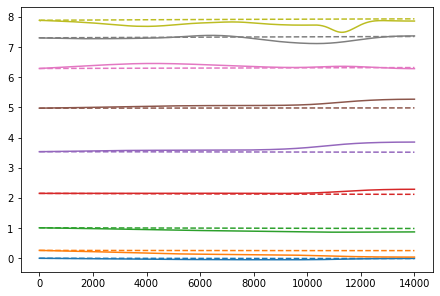

In [105]:
t_idx = [1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]

fig, axs = plt.subplots(2, 5, constrained_layout=True)
axs = axs.flatten()
for i in :
    color = next(axs._get_lines.prop_cycler)['color']
    axs.plot
    color = next(ax._get_lines.prop_cycler)['color']
    plt.plot(swe_dgp.x_coords, h[-i, :], color=color)
    plt.plot(swe_dgp.x_coords, hd[-i, :], "--", color=color)

plt.show()